In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import DropFeatures
from feature_engine.encoding import RareLabelEncoder
from feature_engine.discretisation import ArbitraryDiscretiser
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer, MinMaxScaler
from feature_engine.transformation import BoxCoxTransformer
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.transformation import YeoJohnsonTransformer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from phik import phik_matrix

In [5]:
raw_data = pd.read_csv("../Titanic/Dataset Titanic/train.csv", sep=",")

In [6]:
df = raw_data.copy()

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df['PassengerId'] = df['PassengerId'].astype('object')
df['Survived'] = df['Survived'].astype('category')
df['Sex'] = df['Sex'].astype('category');

In [11]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [12]:
df['Pclass'] = df['Pclass'].astype('category');

In [13]:
df['Cabin'].nunique()

147

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df['Embarked'] = df['Embarked'].astype('category');

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [20]:
df.describe(include=['O'])

,PassengerId,Name,Ticket,Cabin
count,891,891,891,204
unique,891,891,681,147
top,1,"Braund, Mr. Owen Harris",347082,B96 B98
freq,1,1,7,4


In [21]:
df.describe(include=['category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [22]:
survived_counts = df['Survived'].value_counts(normalize=True)
print(survived_counts)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [5, 3]

In [24]:
cat_cols = df.select_dtypes(include=['category']).columns
num_cols = df.select_dtypes(include=['int', 'float']).columns

In [25]:
print(cat_cols)
print(num_cols)

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


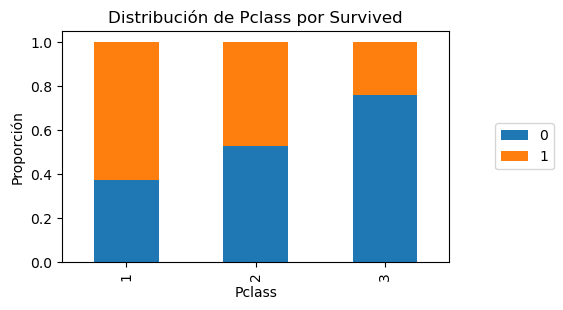

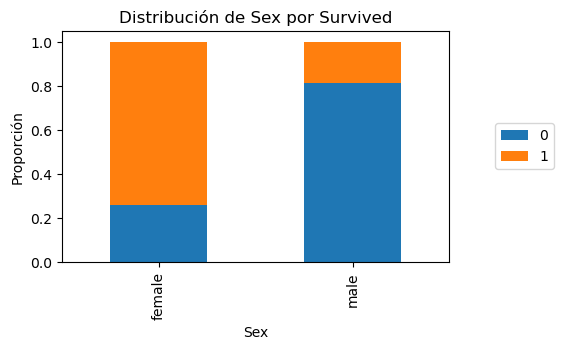

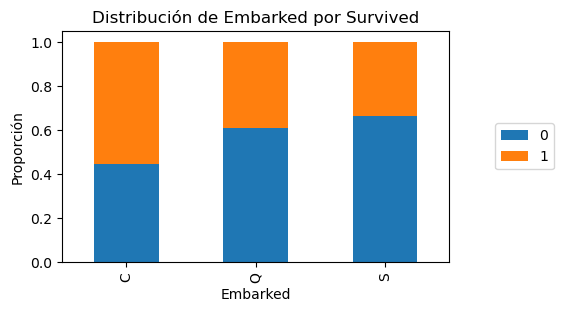

In [26]:
for var in cat_cols:
    if var != 'Survived':
        pd.crosstab(df[var], df["Survived"], normalize='index').plot(kind="bar", stacked=True)
        plt.legend(bbox_to_anchor=(1.1, 0.5), loc='center left')
        plt.title(f'Distribución de {var} por Survived') 
        plt.xlabel(var)  
        plt.ylabel('Proporción') 
        plt.show()  

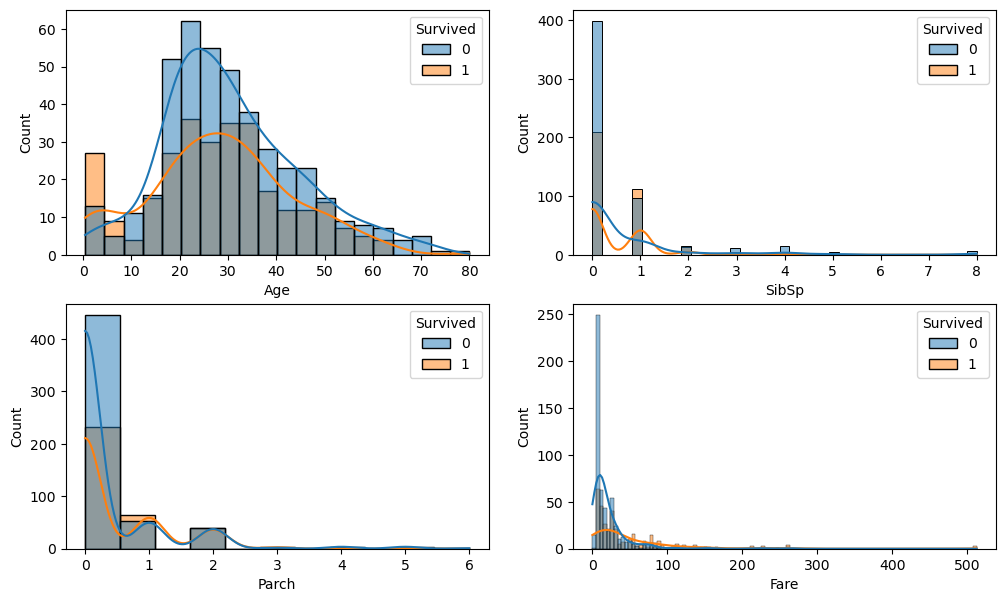

In [27]:
plt.figure(figsize=(12,7))
for i, var in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data = df, x = var, stat = "count", kde=True, hue='Survived');

In [28]:
# Calcular la matriz de correlación usando phik
corr_matrix = phik_matrix(df)

interval columns not set, guessing: ['Age', 'SibSp', 'Parch', 'Fare']


In [29]:
# Crear una máscara para el triángulo superior
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

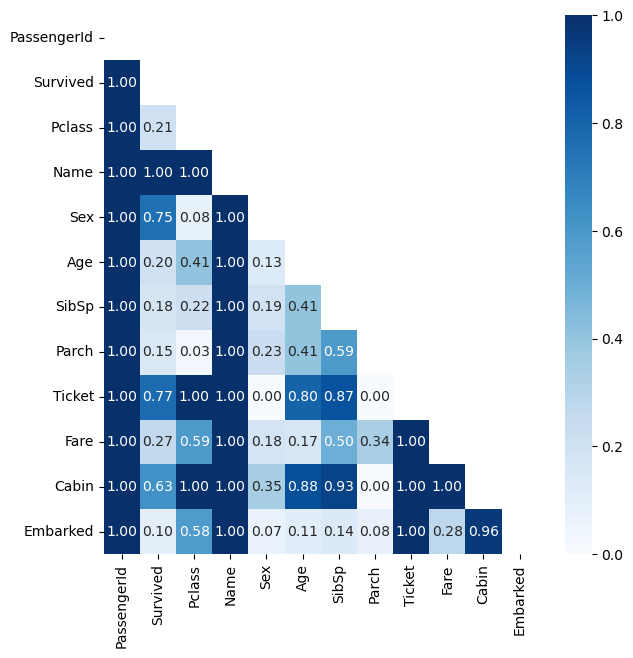

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', mask=mask);

### Separo el conjunto de datos en los conjuntos de entrenamiento y prueba

In [32]:
X = df.drop(columns = "Survived")
y = df.loc[:, ['Survived']]

In [33]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
y;

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size = 0.2,random_state = 42, stratify=y)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  712 non-null    object  
 1   Pclass       712 non-null    category
 2   Name         712 non-null    object  
 3   Sex          712 non-null    category
 4   Age          575 non-null    float64 
 5   SibSp        712 non-null    int64   
 6   Parch        712 non-null    int64   
 7   Ticket       712 non-null    object  
 8   Fare         712 non-null    float64 
 9   Cabin        160 non-null    object  
 10  Embarked     710 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 52.5+ KB


In [37]:
X_train.shape

(712, 11)

In [38]:
X_test.shape

(179, 11)

In [39]:
X_train.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S


In [40]:
y_train.head(4)

,Survived
692,1
481,0
527,0
855,1


### Obtengo los titulos a partir de los nombres

In [42]:
X_train['Title'] = X_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [43]:
X_train['Title']

692      Mr
481      Mr
527      Mr
855     Mrs
801     Mrs
       ... 
359    Miss
258    Miss
736     Mrs
462      Mr
507      Mr
Name: Title, Length: 712, dtype: object

In [44]:
X_train['Title'].value_counts(normalize = True)

Title
Mr          0.578652
Miss        0.198034
Mrs         0.150281
Master      0.043539
Dr          0.008427
Rev         0.007022
Col         0.002809
Mlle        0.002809
Major       0.001404
Lady        0.001404
Sir         0.001404
Ms          0.001404
Jonkheer    0.001404
Don         0.001404
Name: proportion, dtype: float64

In [45]:
X_test['Title'] = X_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [46]:
X_test['Title'].value_counts(normalize = True)

Title
Mr          0.586592
Miss        0.229050
Mrs         0.100559
Master      0.050279
Major       0.005587
Mme         0.005587
Capt        0.005587
Countess    0.005587
Dr          0.005587
Rev         0.005587
Name: proportion, dtype: float64

In [47]:
# Clase para extraer el título y devolver la columna como categoría
class TitleExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, name_column='Name', title_column='Title'):
        self.name_column = name_column
        self.title_column = title_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        X[self.title_column] = X[self.name_column].str.extract(r' ([A-Za-z]+)\.', expand=False)
        X[self.title_column] = X[self.title_column].astype('category')  # Convertir a categoría
        return X

In [48]:
# Para el pipeline
#('title_extractor', TitleExtractor(name_column='Name', title_column='Title')),

### Agrego una caracteristica bivariable que identifica si los pasajeros fueron solos o no

In [50]:
def add_is_alone(df):
    df['IsAlone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)
    return df

In [51]:
X_train = add_is_alone(X_train)
X_test = add_is_alone(X_test)

In [52]:
#Clase para caracteristica IsAlone 
class IsAloneFeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, sibsp_column='SibSp', parch_column='Parch', is_alone_column='IsAlone'):
        # Columnas de entrada y salida
        self.sibsp_column = sibsp_column
        self.parch_column = parch_column
        self.is_alone_column = is_alone_column

    def fit(self, X, y=None):
        # No hay ajuste necesario
        return self

    def transform(self, X, y=None):
        # Crear una copia para evitar cambios en el DataFrame original
        X = X.copy()
        
        # Crear la columna IsAlone: 1 si el pasajero está solo, 0 si no lo está
        X[self.is_alone_column] = ((X[self.sibsp_column] == 0) & (X[self.parch_column] == 0)).astype(int)
        
        return X

In [53]:
# Para el pipeline
# ('is_alone_extractor', IsAloneFeatureExtractor(sibsp_column='SibSp', parch_column='Parch', is_alone_column='IsAlone')),

### Separo los datos de las cabinas

In [55]:
X_train['Cabin_cat'] = X_train['Cabin'].str[0] # captures the first letter
X_train['Cabin_num'] = X_train['Cabin'].str.extract(r'(\d+)')  # captures numerical part

In [56]:
X_train[['Cabin', 'Cabin_cat', 'Cabin_num']].nunique()

Cabin        127
Cabin_cat      8
Cabin_num     84
dtype: int64

In [57]:
X_test['Cabin_cat'] = X_test['Cabin'].str[0] # captures the first letter
X_test['Cabin_num'] = X_test['Cabin'].str.extract(r'(\d+)')  # captures numerical part

In [58]:
X_test[['Cabin', 'Cabin_cat', 'Cabin_num']].nunique()

Cabin        41
Cabin_cat     6
Cabin_num    37
dtype: int64

In [59]:
X_train['Cabin_cat'].unique()

array([nan, 'C', 'A', 'D', 'E', 'F', 'B', 'G', 'T'], dtype=object)

In [60]:
X_test['Cabin_cat'].unique()

array([nan, 'B', 'C', 'F', 'E', 'D', 'A'], dtype=object)

In [61]:
# Combinar X_train con y_train para tener la columna 'Survived' en el mismo DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

In [62]:
train_data['Cabin_cat'] = train_data['Cabin_cat'].fillna("no_cabin")

# Calcular el total de pasajeros por cada cabina
total_passengers_per_cabin = train_data.groupby('Cabin_cat').size().reset_index(name='Total Passengers')

# Calcular el total de sobrevivientes por cada cabina
survivors_per_cabin = train_data[train_data['Survived'] == 1].groupby('Cabin_cat').size().reset_index(name='Survivors')

# Combinar los dos DataFrames en uno solo para obtener el total de pasajeros y sobrevivientes por cabina
cabin_data = total_passengers_per_cabin.merge(survivors_per_cabin, on='Cabin_cat', how='left')

# Calcular el total de pasajeros en el conjunto de datos
total_passengers = train_data.shape[0]

# Calcular el porcentaje de pasajeros en cada cabina
cabin_data['Percentage of Passengers'] = (cabin_data['Total Passengers'] / total_passengers)


# Rellenar los valores nulos en 'Survivors' con 0 (en caso de cabinas sin sobrevivientes)
cabin_data['Survivors'] = cabin_data['Survivors'].fillna(0)

# Calcular la tasa de supervivencia por cabina
cabin_data['Survival Rate'] = cabin_data['Survivors'] / cabin_data['Total Passengers']

# Mostrar el resultado
cabin_data

,Cabin_cat,Total Passengers,Survivors,Percentage of Passengers,Survival Rate
0,A,14,6.0,0.019663,0.428571
1,B,34,25.0,0.047753,0.735294
2,C,41,28.0,0.057584,0.682927
3,D,26,21.0,0.036517,0.807692
4,E,29,22.0,0.040730,0.758621
5,F,11,8.0,0.015449,0.727273
6,G,4,2.0,0.005618,0.500000
7,T,1,0.0,0.001404,0.000000
8,no_cabin,552,161.0,0.775281,0.291667


Letra: Indica la sección del barco donde se encuentra la cabina. Las letras más comunes son:

- A: Cabinas de lujo en la parte superior del barco.
- B: Cabinas en la segunda clase.
- C: Cabinas en la tercera clase.
- D: Cabinas en la parte inferior o en la cubierta de carga.
- E: Cabinas en la parte de atrás o en la cubierta inferior.
- F: Generalmente cabinas en la parte más baja del barco.
- G: Suele referirse a cabinas de menor calidad o en áreas de servicio.

In [64]:
# Rellenar los valores nulos en 'Cabin_num' con "no_cabin"
train_data['Cabin_num'] = train_data['Cabin_num'].fillna("0")

# Calcular el total de pasajeros por cada número de cabina
total_passengers_per_cabin_num = train_data.groupby('Cabin_num').size().reset_index(name='Total Passengers')

# Calcular el total de sobrevivientes por cada número de cabina
survivors_per_cabin_num = train_data[train_data['Survived'] == 1].groupby('Cabin_num').size().reset_index(name='Survivors')

# Combinar los dos DataFrames en uno solo para obtener el total de pasajeros y sobrevivientes por número de cabina
cabin_num_data = total_passengers_per_cabin_num.merge(survivors_per_cabin_num, on='Cabin_num', how='left')

# Rellenar los valores nulos en 'Survivors' con 0 (en caso de cabinas sin sobrevivientes)
cabin_num_data['Survivors'] = cabin_num_data['Survivors'].fillna(0)

# Calcular el total de pasajeros en el conjunto de datos
total_passengers = train_data.shape[0]

# Calcular el porcentaje de pasajeros en cada número de cabina
cabin_num_data['Percentage of Passengers'] = (cabin_num_data['Total Passengers'] / total_passengers)

# Calcular la tasa de supervivencia por número de cabina
cabin_num_data['Survival Rate'] = cabin_num_data['Survivors'] / cabin_num_data['Total Passengers']

# Mostrar el resultado
cabin_num_data

,Cabin_num,Total Passengers,Survivors,Percentage of Passengers,Survival Rate
0,0,555,162.0,0.779494,0.291892
1,10,3,2.0,0.004213,0.666667
2,101,4,4.0,0.005618,1.000000
3,102,1,0.0,0.001404,0.000000
4,104,1,1.0,0.001404,1.000000
...,...,...,...,...,...
80,93,2,2.0,0.002809,1.000000
81,94,1,0.0,0.001404,0.000000
82,95,1,0.0,0.001404,0.000000
83,96,2,2.0,0.002809,1.000000


In [65]:
cabin_num_data['Cabin_num'] = cabin_num_data['Cabin_num'].astype('int')

In [66]:
cabin_num_data['Total Passengers'][cabin_num_data['Cabin_num'] > 100].sum()

17

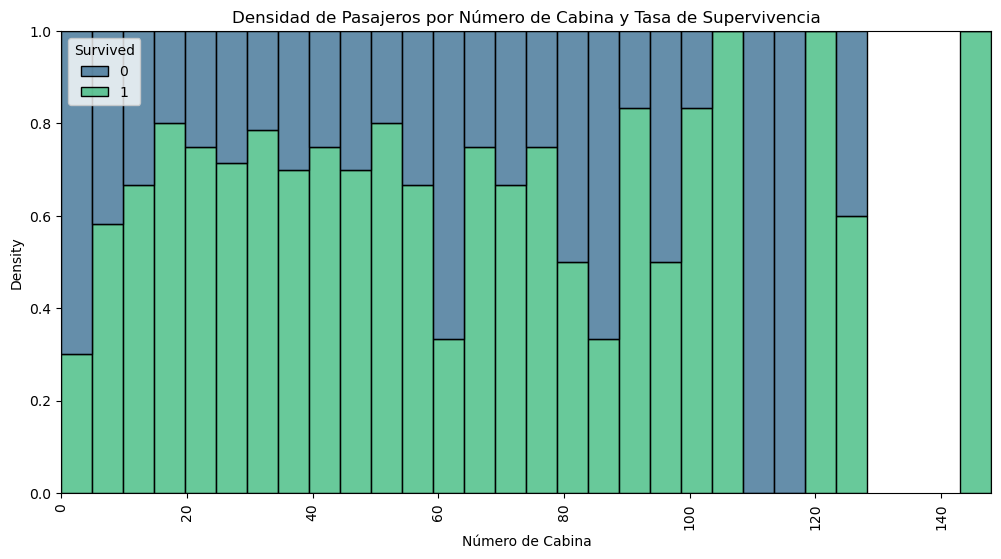

In [67]:
# Combinar train_data con cabin_num_data para incluir 'Survived'
combined_data = train_data[['Cabin_num', 'Survived']].copy()

# Asegúrate de que 'Cabin_num' sea del tipo entero
combined_data['Cabin_num'] = combined_data['Cabin_num'].fillna(0).astype(int)

# Crear el histograma con densidad
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='Cabin_num', stat='density', 
             hue='Survived', multiple="fill", bins=30, palette='viridis')

# Configurar títulos y etiquetas
plt.title('Densidad de Pasajeros por Número de Cabina y Tasa de Supervivencia')
plt.xlabel('Número de Cabina')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si hay muchos números
plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1

# Mostrar el gráfico
plt.show()

Número: Indica la ubicación específica de la cabina en la sección correspondiente. Cada número puede variar en el número de cabinas que hay en cada sección, y normalmente el número más bajo está más cerca del centro del barco

- Grupo 1: 0 (para las cabinas imputadas)
- Grupo 2: 1-50
- Grupo 3: 51-100
- Grupo 4: 101-148

In [70]:
# Clases

In [71]:
class CabinCategoryExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, cabin_column='Cabin', category_column='Cabin_cat'):
        # Columnas de entrada y salida
        self.cabin_column = cabin_column
        self.category_column = category_column

    def fit(self, X, y=None):
        # No hay ajuste necesario
        return self

    def transform(self, X, y=None):
        # Crear una copia para evitar cambios en el DataFrame original
        X = X.copy()
        
        # Capturar la primera letra de la columna 'Cabin'
        X[self.category_column] = X[self.cabin_column].str[0]
        
        return X

In [72]:
class CabinNumberExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, cabin_column='Cabin', number_column='Cabin_num'):
        # Columnas de entrada y salida
        self.cabin_column = cabin_column
        self.number_column = number_column

    def fit(self, X, y=None):
        # No hay ajuste necesario
        return self

    def transform(self, X, y=None):
        # Crear una copia para evitar cambios en el DataFrame original
        X = X.copy()
        
        # Capturar la parte numérica de la columna 'Cabin'
        X[self.number_column] = X[self.cabin_column].str.extract(r'(\d+)', expand=False)
                
        return X

In [73]:
# Para el pipeline
# ('cabin_category_extractor', CabinCategoryExtractor(cabin_column='Cabin', category_column='Cabin_cat')),
# ('cabin_number_extractor', CabinNumberExtractor(cabin_column='Cabin', number_column='Cabin_num')),

#### Antes de poder agrupar las categorias de las cabinas y discretizar los números de las cabinas es necesario imputar los valores nulos
#### Pero antes elimino las caracteristicas que no tienen poder predictivo o que pasaron a ser redundantes

In [75]:
# Crear el transformador DropFeatures para eliminar varias columnas a la vez
drop_features_transformer = DropFeatures(features_to_drop=['Name', 'Cabin', 'Ticket', 'PassengerId'])

In [76]:
# Aplicar el transformador directamente 
X_train = drop_features_transformer.fit_transform(X_train)
X_test = drop_features_transformer.transform(X_test)

In [77]:
X_train.dtypes

Pclass       category
Sex          category
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked     category
Title          object
IsAlone         int32
Cabin_cat      object
Cabin_num      object
dtype: object

In [78]:
# Para el pipeline no es necesario crear una clase 
# ('drop_features', DropFeatures(features_to_drop=['Name', 'Cabin', 'Ticket', 'PassengerId'])),

### Analisis para imputación de valores nulos

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     712 non-null    category
 1   Sex        712 non-null    category
 2   Age        575 non-null    float64 
 3   SibSp      712 non-null    int64   
 4   Parch      712 non-null    int64   
 5   Fare       712 non-null    float64 
 6   Embarked   710 non-null    category
 7   Title      712 non-null    object  
 8   IsAlone    712 non-null    int32   
 9   Cabin_cat  160 non-null    object  
 10  Cabin_num  157 non-null    object  
dtypes: category(3), float64(2), int32(1), int64(2), object(3)
memory usage: 49.7+ KB


In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 565 to 637
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     179 non-null    category
 1   Sex        179 non-null    category
 2   Age        139 non-null    float64 
 3   SibSp      179 non-null    int64   
 4   Parch      179 non-null    int64   
 5   Fare       179 non-null    float64 
 6   Embarked   179 non-null    category
 7   Title      179 non-null    object  
 8   IsAlone    179 non-null    int32   
 9   Cabin_cat  44 non-null     object  
 10  Cabin_num  43 non-null     object  
dtypes: category(3), float64(2), int32(1), int64(2), object(3)
memory usage: 12.8+ KB


In [82]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

In [83]:
X_train[vars_with_na].isnull().sum().sort_values(ascending=False)

Cabin_num    555
Cabin_cat    552
Age          137
Embarked       2
dtype: int64

In [84]:
cat_cols = X_train.select_dtypes(include=['category', 'object']).columns
num_cols = X_train.select_dtypes(include=['int', 'float']).columns

In [85]:
cat_na = [var for var in cat_cols if var in vars_with_na]
num_na = [var for var in num_cols if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  3
Number of numerical variables with na:  1


In [86]:
cat_na

['Embarked', 'Cabin_cat', 'Cabin_num']

In [87]:
num_na

['Age']

#### Relacion de los nulos con la supervivencia

In [89]:
def analyse_na_survival(df, var):
    # Copia del dataframe para no modificar el original
    df = df.copy()

    
    # Nos aseguramos de que 'Survived' sea numérico
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

    
    # Creamos una variable temporal que indica 1 si el valor es nulo y 0 si no
    df[var + '_na'] = np.where(df[var].isnull(), 1, 0)

    # Calculamos la tasa de supervivencia para ambos grupos (nulos y no nulos)
    survival_rates = df.groupby(var + '_na')['Survived'].mean()
    
    # Creamos un DataFrame temporal para almacenar los resultados
    tmp = pd.DataFrame({'Survival_Rate': survival_rates, 'Count': df.groupby(var + '_na')['Survived'].count()})

    # Graficamos los resultados
    tmp['Survival_Rate'].plot(kind='barh', legend=False, title='Tasa de Supervivencia por Nulos en ' + var, color='skyblue')
    plt.xlabel('Tasa de Supervivencia')
    plt.ylabel('Nulos (1) / No Nulos (0)')
    plt.axvline(0.5, color='red', linestyle='--')  # Línea de referencia
    plt.show()


In [90]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
data = pd.concat([train_data, test_data], axis=0)

In [91]:
data.shape

(891, 12)

In [92]:
data.isnull().sum()

Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
IsAlone        0
Cabin_cat    687
Cabin_num    691
Survived       0
dtype: int64

In [93]:
def analyse_na_survival(df, var):
    # Copia del dataframe para no modificar el original
    df = df.copy()

    # Nos aseguramos de que 'Survived' sea numérico
    df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

    # Calculamos la tasa de supervivencia promedio de todo el conjunto de datos
    overall_survival_rate = df['Survived'].mean()

    # Creamos una variable temporal que indica 1 si el valor es nulo y 0 si no
    df[var + '_na'] = np.where(df[var].isnull(), 1, 0)

    # Calculamos la tasa de supervivencia para ambos grupos (nulos y no nulos)
    survival_rates = df.groupby(var + '_na')['Survived'].mean()

    # Creamos un DataFrame temporal para almacenar los resultados
    tmp = pd.DataFrame({
        'Survival_Rate': survival_rates,
        'Count': df.groupby(var + '_na')['Survived'].count()
    })

    # Graficamos los resultados
    ax = tmp['Survival_Rate'].plot(kind='barh', legend=False, title='Tasa de Supervivencia por Nulos en ' + var, color='skyblue')
    plt.xlabel('Tasa de Supervivencia')
    plt.ylabel('Nulos (1) / No Nulos (0)')
    
    # Línea de referencia para la tasa de supervivencia general
    plt.axvline(overall_survival_rate, color='red', linestyle='--', label=f'Tasa de Supervivencia Promedio: {overall_survival_rate:.2f}')
    
    # Colocamos las etiquetas de las barras a la derecha de cada barra
    for index, value in enumerate(tmp['Survival_Rate']):
        ax.text(value + 0.02, index, f'{value:.2f}', va='center')

    # Mostrar leyenda
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

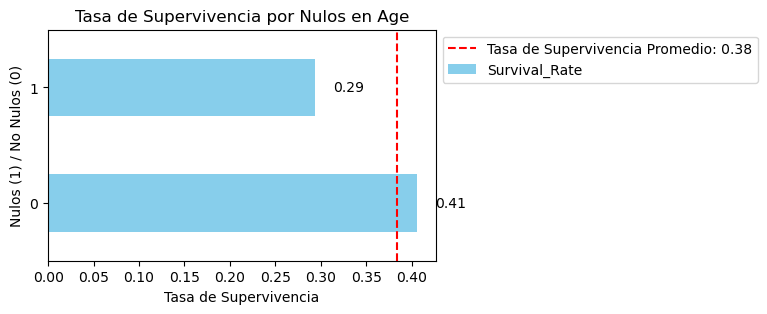

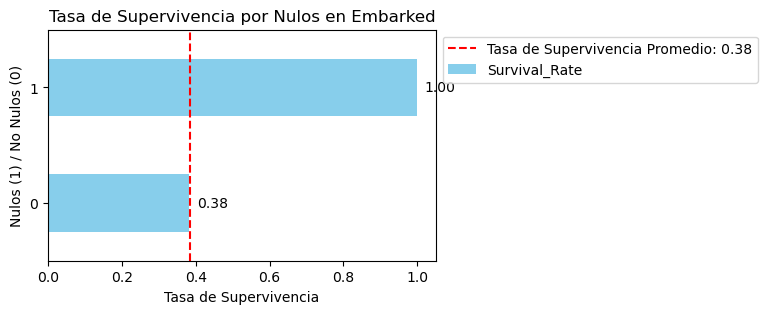

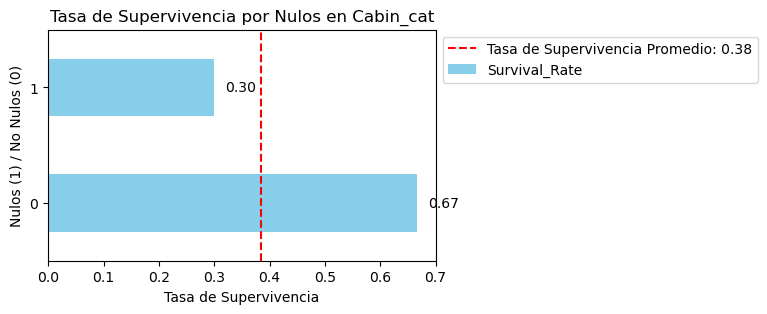

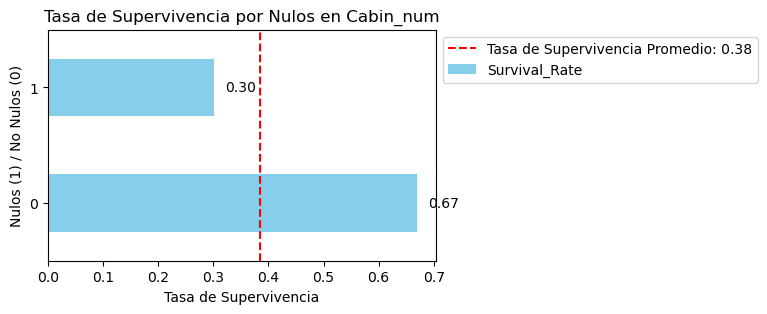

In [94]:
for var in vars_with_na:
    analyse_na_survival(data, var)

#### Como, para todas las caracteristicas del conjunto de entrenamiento, la tasa de supervivencia media es diferente la informacion existe y donde las caracteristicas toman valores nulos es muy probable que los datos faltantes tengan poder predictivo 

In [97]:
# Configuración de imputadores específicos para cada columna
imputer_cabin_cat = CategoricalImputer(imputation_method="missing", fill_value="Missing", variables=['Cabin_cat'])
imputer_cabin_num = CategoricalImputer(imputation_method="missing", fill_value="0", variables=['Cabin_num'])
imputer_embarked = CategoricalImputer(imputation_method="frequent", variables=['Embarked'])

In [98]:
# Agregar los imputadores de manera secuencial en un Pipeline
imputer_pipeline = Pipeline([
    ('impute_cabin_cat', imputer_cabin_cat),
    ('impute_cabin_num', imputer_cabin_num),
    ('impute_embarked', imputer_embarked)
])

In [99]:
imputer_pipeline.fit(X_train)  

Pipeline(steps=[('impute_cabin_cat',
                 CategoricalImputer(variables=['Cabin_cat'])),
                ('impute_cabin_num',
                 CategoricalImputer(fill_value='0', variables=['Cabin_num'])),
                ('impute_embarked',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Embarked']))])

In [100]:
# Ajuste e imputación en el conjunto de entrenamiento y transformación en DataFrame
X_train_imputed = pd.DataFrame(imputer_pipeline.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Transformación del conjunto de prueba y conversión en DataFrame
X_test_imputed = pd.DataFrame(imputer_pipeline.transform(X_test), columns=X_test.columns, index=X_test.index)

In [101]:
X_train_imputed.isnull().sum()

Pclass         0
Sex            0
Age          137
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
IsAlone        0
Cabin_cat      0
Cabin_num      0
dtype: int64

In [102]:
X_train_imputed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Cabin_cat,Cabin_num
692,3,male,NaN,0,0,56.4958,S,Mr,1,Missing,0
481,2,male,NaN,0,0,0.0000,S,Mr,1,Missing,0
527,1,male,NaN,0,0,221.7792,S,Mr,1,C,95
855,3,female,18.0,0,1,9.3500,S,Mrs,0,Missing,0
801,2,female,31.0,1,1,26.2500,S,Mrs,0,Missing,0
...,...,...,...,...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Q,Miss,1,Missing,0
258,1,female,35.0,0,0,512.3292,C,Miss,1,Missing,0
736,3,female,48.0,1,3,34.3750,S,Mrs,0,Missing,0
462,1,male,47.0,0,0,38.5000,S,Mr,1,E,63


In [103]:
X_test_imputed.isnull().sum()

Pclass        0
Sex           0
Age          40
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
IsAlone       0
Cabin_cat     0
Cabin_num     0
dtype: int64

In [104]:
X_test_imputed.shape

(179, 11)

In [105]:
X_train.dtypes

Pclass       category
Sex          category
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked     category
Title          object
IsAlone         int32
Cabin_cat      object
Cabin_num      object
dtype: object

In [106]:
# Para el pipeline
# ('impute_cabin_cat', CategoricalImputer(imputation_method="missing", fill_value="Missing", variables=['Cabin_cat'])),
# ('impute_cabin_num', CategoricalImputer(imputation_method="missing", fill_value="0", variables=['Cabin_num'])),
# ('impute_embarked', CategoricalImputer(imputation_method="frequent", variables=['Embarked'])),

#### Una vez imputados los valores donde habia nulos en Cabin_cat, Cabin_num y Title es necesario convertir los tipos de datos para luego poder agrupar, discretizar y/o convertir las caracteristicas en dummies con one hot encoder

In [108]:
X_train_imputed['Cabin_cat'] = X_train_imputed['Cabin_cat'].astype('category')
X_train_imputed['Title'] = X_train_imputed['Title'].astype('category')
X_train_imputed['Cabin_num'] = X_train_imputed['Cabin_num'].astype('int32')

In [109]:
X_test_imputed['Cabin_cat'] = X_test_imputed['Cabin_cat'].astype('category')
X_test_imputed['Title'] = X_test_imputed['Title'].astype('category')
X_test_imputed['Cabin_num'] = X_test_imputed['Cabin_num'].astype('int32')

In [110]:
X_train_imputed.dtypes

Pclass       category
Sex          category
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked     category
Title        category
IsAlone         int32
Cabin_cat    category
Cabin_num       int32
dtype: object

In [111]:
class DType_first_Converter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()  # Evitar modificar el original

        X['Cabin_cat'] = X['Cabin_cat'].astype('object') # De esta manera podemos mapear sus valores
        X['Title'] = X['Title'].astype('category')
        X['Cabin_num'] = X['Cabin_num'].astype('int32')
        X['Embarked'] = X['Embarked'].astype('category')
        X['Sex'] = X['Sex'].astype('category')
        X['Pclass'] = X['Pclass'].astype('category')
               
        return X

In [112]:
# Para el pipeline
# ('dtype_fisrt_converter', DType_first_Converter()),

#### Verifico que no se haya alterado el orden de los indices

In [114]:
X_train_imputed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Cabin_cat,Cabin_num
692,3,male,NaN,0,0,56.4958,S,Mr,1,Missing,0
481,2,male,NaN,0,0,0.0000,S,Mr,1,Missing,0
527,1,male,NaN,0,0,221.7792,S,Mr,1,C,95
855,3,female,18.0,0,1,9.3500,S,Mrs,0,Missing,0
801,2,female,31.0,1,1,26.2500,S,Mrs,0,Missing,0
...,...,...,...,...,...,...,...,...,...,...,...
359,3,female,NaN,0,0,7.8792,Q,Miss,1,Missing,0
258,1,female,35.0,0,0,512.3292,C,Miss,1,Missing,0
736,3,female,48.0,1,3,34.3750,S,Mrs,0,Missing,0
462,1,male,47.0,0,0,38.5000,S,Mr,1,E,63


### Recategorizacion de las categorias y números de cabinas

In [116]:
X_train_imputed['Cabin_num'].unique()

array([  0,  95,  26,  78,  15,  49,  52, 104,   5,  73,  44,  96,  30,
        45,   6,  70,  57,  80,  69, 106,   8,   9,  68,  17,  58, 125,
        18,  83,   3,  33,  92, 121,  22,  23,  67,  35,  85,   2,  12,
        14,  86,  10,  47,  91,  62,  65, 101,   7,  31,  11, 102, 124,
        82,   4,  34, 110,  19,  42,  16,  94,  50,  99, 118,  46,  39,
        37,  20,  24,  56,  25,  36, 126,  32,  90,  38,  28,  93,  63,
        21,  77, 123,  40,  54,  51, 148])

In [117]:
freq_cat_cab = X_train_imputed.groupby(['Cabin_cat'], observed = False).size().reset_index(name='Count')
freq_cat_cab['Relative Frequency'] = freq_cat_cab['Count'] / sum(freq_cat_cab['Count'])
freq_cat_cab

,Cabin_cat,Count,Relative Frequency
0,A,14,0.019663
1,B,34,0.047753
2,C,41,0.057584
3,D,26,0.036517
4,E,29,0.040730
5,F,11,0.015449
6,G,4,0.005618
7,Missing,552,0.775281
8,T,1,0.001404


In [118]:
def recategorize_cabins(df):
    cabin_mapping = {
        'A': 'Cabina_Lujo',
        'B': 'Cabinas_clase_media',
        'C': 'Cabinas_clase_media',
        'D': 'Cabinas_clase_media_baja',
        'E': 'Cabinas_clase_media_baja',
        'F': 'Cabinas_economicas',
        'G': 'Cabinas_economicas',
        'T': 'Cabinas_economicas',
        'Missing': 'Missing'
    }
    df['Cabin_category'] = df['Cabin_cat'].map(cabin_mapping)
    return df

In [119]:
# Crear un FunctionTransformer con la función definida
recategorizer = FunctionTransformer(recategorize_cabins, validate=False)

In [120]:
X_train_imputed_recat = recategorizer.fit_transform(X_train_imputed)
X_test_imputed_recat = recategorizer.transform(X_test_imputed)

In [121]:
X_train_imputed_recat.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Cabin_cat,Cabin_num,Cabin_category
692,3,male,NaN,0,0,56.4958,S,Mr,1,Missing,0,Missing
481,2,male,NaN,0,0,0.0000,S,Mr,1,Missing,0,Missing
527,1,male,NaN,0,0,221.7792,S,Mr,1,C,95,Cabinas_clase_media
855,3,female,18.0,0,1,9.3500,S,Mrs,0,Missing,0,Missing


In [122]:
X_test_imputed_recat.isnull().sum()

Pclass             0
Sex                0
Age               40
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
IsAlone            0
Cabin_cat          0
Cabin_num          0
Cabin_category     0
dtype: int64

In [123]:
X_train_imputed_recat = X_train_imputed_recat.drop(columns = 'Cabin_cat')
X_test_imputed_recat = X_test_imputed_recat.drop(columns = 'Cabin_cat');

In [124]:
class CabinRecategorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cabin_mapping = {
            'A': 'Cabina_Lujo',
            'B': 'Cabinas_clase_media',
            'C': 'Cabinas_clase_media',
            'D': 'Cabinas_clase_media_baja',
            'E': 'Cabinas_clase_media_baja',
            'F': 'Cabinas_economicas',
            'G': 'Cabinas_economicas',
            'T': 'Cabinas_economicas',
            'Missing': 'Missing' 
        }
    
    def fit(self, X, y=None):
        return self  # No necesita ajuste, solo transformación

    def transform(self, X):
        X = X.copy()  # Evitar modificar el DataFrame original
        # Usar fillna para asegurar que no haya NaN antes de aplicar el mapeo
        X['Cabin_category'] = X['Cabin_cat'].fillna('Missing').map(self.cabin_mapping).astype('category')
        return X

In [125]:
# Para el pipeline
# ('cabin_recategorizer', CabinRecategorizer()),
# Despues hay que eliminar Cabin_cat

#### Agrupamiento arbitrario de los numeros de las cabinas
- Grupo 1: 0 (para los numeros de las cabinas que tenían valores nulos)
- Grupo 2: 1-50
- Grupo 3: 51-100
- Grupo 4: 101-148

In [127]:
# Creamos el discretizador
discretiser = ArbitraryDiscretiser(
    binning_dict= {
    "Cabin_num": [0, 1, 50, 100, np.inf]  # Definimos los grupos para Cabin_num
    }
)

In [128]:
# Aplicamos el discretizador al DataFrame
X_train_imputed_recat2 = discretiser.fit_transform(X_train_imputed_recat)
X_test_imputed_recat2 = discretiser.transform(X_test_imputed_recat)

In [129]:
X_train_imputed_recat2['Cabin_num'].unique()

array([0, 2, 1, 3], dtype=int64)

In [130]:
# Clase que discretariza los números de las cabinas y convierte a tipo categórico
class CustomCabinNumDiscretiser(BaseEstimator, TransformerMixin):
    def __init__(self, binning_dict=None):
        if binning_dict is None:
            self.binning_dict = {"Cabin_num": [0, 1, 50, 100, np.inf]}
        else:
            self.binning_dict = binning_dict

    def fit(self, X, y=None):
        return self  # No necesitamos ajustar nada aquí

    def transform(self, X):
        X = X.copy()  # Evitar modificar el original
        
        for feature, bins in self.binning_dict.items():
            # Discretizar usando pd.cut y devolver enteros como etiquetas
            X[feature] = pd.cut(X[feature], bins=bins, labels=range(len(bins)-1), include_lowest=True)

        # Convertir a tipo entero
        for feature in self.binning_dict.keys():
            X[feature] = X[feature].astype(int)
        
        return X

In [131]:
# Para el pipeline
# ('cabin_discretiser', CustomCabinNumDiscretiser()),

In [132]:
# Vuelvo a verificar que no se hayan modificado los indices
X_train_imputed_recat2.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Cabin_num,Cabin_category
692,3,male,NaN,0,0,56.4958,S,Mr,1,0,Missing
481,2,male,NaN,0,0,0.0000,S,Mr,1,0,Missing
527,1,male,NaN,0,0,221.7792,S,Mr,1,2,Cabinas_clase_media
855,3,female,18.0,0,1,9.3500,S,Mrs,0,0,Missing


In [133]:
# Cambiamos las etiquetas a las que deseas
X_train_imputed_recat2['Cabin_num'] = X_train_imputed_recat2['Cabin_num'].map({
    0: 'Missing',
    1: 'Cabinas_Centro',
    2: 'Cabinas_mitad',
    3: 'Cabinas_extremos'
})

In [134]:
X_test_imputed_recat2['Cabin_num'] = X_test_imputed_recat2['Cabin_num'].map({
    0: 'Missing',
    1: 'Cabinas_Centro',
    2: 'Cabinas_mitad',
    3: 'Cabinas_extremos'
})

In [135]:
class CabinNumMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapping=None):
        # Diccionario de mapeo
        if mapping is None:
            self.mapping = {
                0: 'Missing',
                1: 'Cabinas_Centro',
                2: 'Cabinas_mitad',
                3: 'Cabinas_extremos'
            }
        else:
            self.mapping = mapping

    def fit(self, X, y=None):
        return self  # No necesita ajuste

    def transform(self, X):
        X = X.copy()  # Evitar modificar el original
        # Mapear los valores a las categorías
        X['Cabin_num'] = X['Cabin_num'].map(self.mapping)
        return X

In [136]:
# Para el pipeline
# ('cabin_num_mapper', CabinNumMapper()),

### Agrupamiento de titulos raros

In [138]:
X_train_imputed_recat2['Title'].value_counts(normalize = True)

Title
Mr          0.578652
Miss        0.198034
Mrs         0.150281
Master      0.043539
Dr          0.008427
Rev         0.007022
Col         0.002809
Mlle        0.002809
Don         0.001404
Jonkheer    0.001404
Lady        0.001404
Major       0.001404
Ms          0.001404
Sir         0.001404
Name: proportion, dtype: float64

In [139]:
rare_encoder = RareLabelEncoder(
    tol=0.04,  # minimal percentage to be considered non-rare
    n_categories=4,  # minimal number of categories the variable should have to re-cgroup rare categories
    variables=[
        "Title"
    ],
    replace_with='Rare_Title',
)

In [140]:
rare_encoder.fit(X_train_imputed_recat2)

RareLabelEncoder(n_categories=4, replace_with='Rare_Title', tol=0.04,
                 variables=['Title'])

In [141]:
rare_encoder.encoder_dict_

{'Title': ['Mr', 'Miss', 'Mrs', 'Master']}

In [142]:
X_train_imputed_recat3 = rare_encoder.transform(X_train_imputed_recat2)
X_test_imputed_recat3 = rare_encoder.transform(X_test_imputed_recat2)

In [143]:
# No hace falta crear una clase para esta transformacion
# Para el pipeline
# ('rare_encoder', RareLabelEncoder(tol=0.04, n_categories=4, variables=["Title"], replace_with='Rare_Title')),

### Agrupo por cantidad de acompañantes

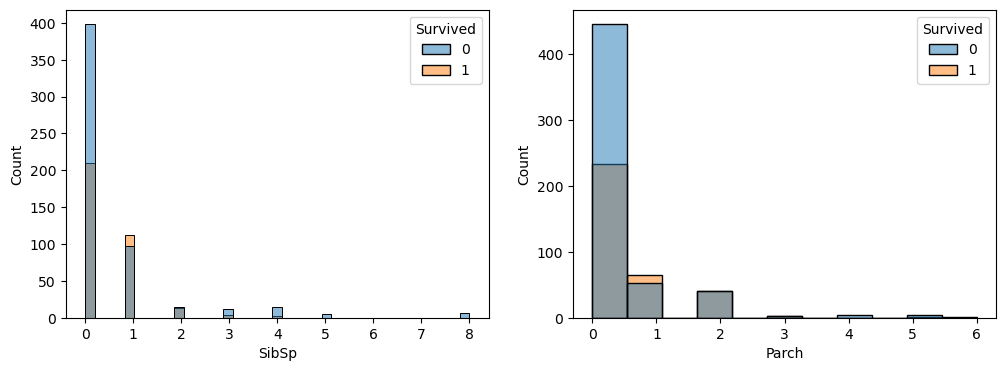

In [145]:
plt.figure(figsize=(12,4))
for i, var in enumerate(['SibSp', 'Parch']):
    plt.subplot(1, 2, i+1)
    sns.histplot(data = data, x = var, stat = "count", kde=False, hue='Survived');

In [146]:
print(X_train_imputed_recat3['Parch'].nunique())
print(X_test_imputed_recat3['Parch'].nunique())
print(X_train_imputed_recat3['SibSp'].nunique())
print(X_test_imputed_recat3['SibSp'].nunique())

7
3
7
7


In [147]:
disc = ArbitraryDiscretiser(
    binning_dict = {
        "SibSp": [0, 0.9, 1.9, 2.9, np.inf],
        "Parch": [0, 0.9, 1.9, 2.9, np.inf]},
)

In [148]:
# Ajustar el discretizador a tus datos
X_discretized = disc.fit_transform(X_train_imputed_recat3)

In [149]:
X_discretized_test = disc.transform(X_test_imputed_recat3)

In [150]:
# Verifico los indices
X_discretized.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Cabin_num,Cabin_category
692,3,male,NaN,0,0,56.4958,S,Mr,1,Missing,Missing
481,2,male,NaN,0,0,0.0000,S,Mr,1,Missing,Missing
527,1,male,NaN,0,0,221.7792,S,Mr,1,Cabinas_mitad,Cabinas_clase_media
855,3,female,18.0,0,1,9.3500,S,Mrs,0,Missing,Missing


In [151]:
# Clase para discretizar por la cantidad de familiares
class CustomDiscretiser(BaseEstimator, TransformerMixin):
    def __init__(self, binning_dict=None):
        if binning_dict is None:
            self.binning_dict = {
                "SibSp": [0, 0.9, 1.9, 2.9, np.inf],
                "Parch": [0, 0.9, 1.9, 2.9, np.inf]
            }
        else:
            self.binning_dict = binning_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Evitar modificar el original
        # Aplicar discretización
        for feature, bins in self.binning_dict.items():
            X[feature] = pd.cut(X[feature], bins=bins, labels=False, include_lowest=True)  # Devolver índices en lugar de etiquetas
        return X

In [152]:
# Para el pipeline
# ('family_discretiser', CustomDiscretiser()),

In [153]:
# Cambiar los nombres de los bins después de la discretización
# Suponiendo que `X_discretized` tiene las columnas 'SibSp' y 'Parch'
X_discretized['SibSp'] = X_discretized['SibSp'].replace({0: 'Sin hermanos', 1: '1 hermano', 2: '2 hermanos', 3:'3 o más hermanos'})
X_discretized['Parch'] = X_discretized['Parch'].replace({0: 'Sin padres/hijos', 1: '1 padre/hijo', 2: '2 padres/hijos', 3: '3 o más padres/hijos'})


In [154]:
# Cambiar los nombres de los bins después de la discretización
# Suponiendo que `X_discretized_test` tiene las columnas 'SibSp' y 'Parch'
X_discretized_test['SibSp'] = X_discretized_test['SibSp'].replace({0: 'Sin hermanos', 1: '1 hermano', 2: '2 hermanos', 3: '3 o más hermanos'})
X_discretized_test['Parch'] = X_discretized_test['Parch'].replace({0: 'Sin padres/hijos', 1: '1 padre/hijo', 2: '2 padres/hijos', 3: '3 o más padres/hijos'})


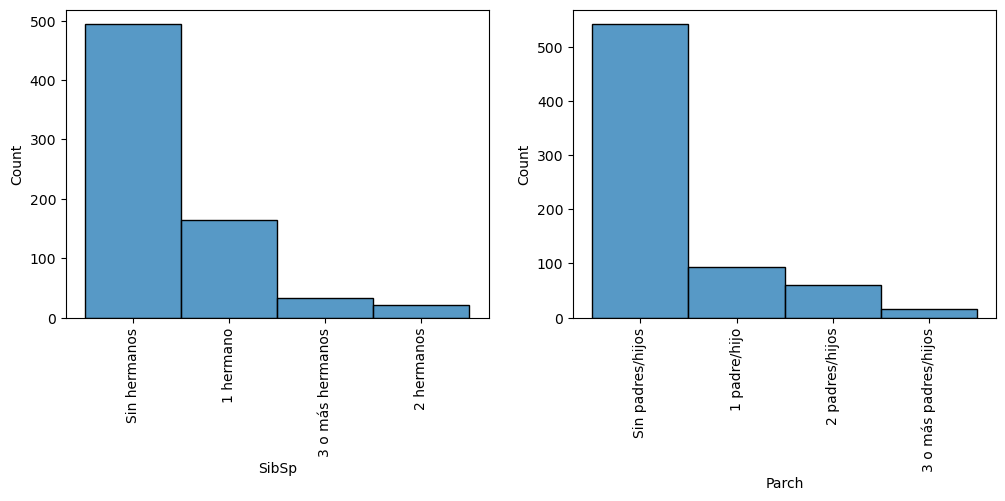

In [155]:
plt.figure(figsize=(12,4))
for i, var in enumerate(['SibSp', 'Parch']):
    plt.subplot(1, 2, i+1)
    sns.histplot(data = X_discretized, x = var)
    plt.xticks(rotation=90);

In [156]:
# Clase para mapear tamaños de familia a categorías descriptivas
class FamilySizeMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Diccionarios de mapeo
        self.sibsp_mapping = {
            0: 'Sin hermanos',
            1: '1 hermano',
            2: '2 hermanos',
            3: '3 o más hermanos',
            4: '3 o más hermanos'  # Puedes ajustar o eliminar esta línea según sea necesario
        }
        self.parch_mapping = {
            0: 'Sin padres/hijos',
            1: '1 padre/hijo',
            2: '2 padres/hijos',
            3: '3 o más padres/hijos',
            4: '3 o más padres/hijos'  # Igual aquí, ajuste según necesidad
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Evitar modificar el original
        # Reemplazar enteros por categorías
        X['SibSp'] = X['SibSp'].replace(self.sibsp_mapping).astype('category')
        X['Parch'] = X['Parch'].replace(self.parch_mapping).astype('category')
        return X


In [157]:
# Para el pipeline
# ('family_mapper', FamilySizeMapper()), 

### Transformar las clases de las categorias en dummies

In [159]:
cat_cols = X_discretized.select_dtypes(include=['category','object']).columns
cat_cols_list = cat_cols.tolist()
cat_cols_list

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Title',
 'Cabin_num',
 'Cabin_category']

In [160]:
encoder = OneHotEncoder(
    drop = "first",   #if_binary
    sparse_output = False,
    handle_unknown = "infrequent_if_exist",  # helps deal with rare labels
    dtype = "int"
).set_output(transform="pandas")

In [161]:
# encoder.set_output(transform="pandas")

In [162]:
X_train_enc = encoder.fit_transform(X_discretized[cat_cols_list])

In [163]:
X_train_enc_test = encoder.transform(X_discretized_test[cat_cols_list])

In [164]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Pclass_2                                 712 non-null    int32
 1   Pclass_3                                 712 non-null    int32
 2   Sex_male                                 712 non-null    int32
 3   SibSp_2 hermanos                         712 non-null    int32
 4   SibSp_3 o más hermanos                   712 non-null    int32
 5   SibSp_Sin hermanos                       712 non-null    int32
 6   Parch_2 padres/hijos                     712 non-null    int32
 7   Parch_3 o más padres/hijos               712 non-null    int32
 8   Parch_Sin padres/hijos                   712 non-null    int32
 9   Embarked_Q                               712 non-null    int32
 10  Embarked_S                               712 non-null    int32
 11  Title_Mis

In [165]:
X_train_enc_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 565 to 637
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Pclass_2                                 179 non-null    int32
 1   Pclass_3                                 179 non-null    int32
 2   Sex_male                                 179 non-null    int32
 3   SibSp_2 hermanos                         179 non-null    int32
 4   SibSp_3 o más hermanos                   179 non-null    int32
 5   SibSp_Sin hermanos                       179 non-null    int32
 6   Parch_2 padres/hijos                     179 non-null    int32
 7   Parch_3 o más padres/hijos               179 non-null    int32
 8   Parch_Sin padres/hijos                   179 non-null    int32
 9   Embarked_Q                               179 non-null    int32
 10  Embarked_S                               179 non-null    int32
 11  Title_Mis

In [166]:
X_prepro1 = X_discretized.drop(columns = cat_cols_list) 
X_prepro1 = pd.concat([X_prepro1, X_train_enc], axis= 1)
X_prepro1

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mr,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing
692,NaN,56.4958,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
481,NaN,0.0000,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
527,NaN,221.7792,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
855,18.0,9.3500,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
801,31.0,26.2500,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,NaN,7.8792,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
258,35.0,512.3292,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
736,48.0,34.3750,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
462,47.0,38.5000,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [167]:
X_prepro1_test = X_discretized_test.drop(columns = cat_cols_list) 
X_prepro1_test = pd.concat([X_prepro1_test, X_train_enc_test], axis= 1)
X_prepro1_test

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mr,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing
565,24.0,24.1500,0,0,1,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
160,44.0,16.1000,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
553,22.0,7.2250,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
860,41.0,14.1083,0,0,1,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
241,NaN,15.5000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,25.0,26.0000,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
91,20.0,7.8542,1,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
883,28.0,10.5000,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
473,23.0,13.7917,1,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [168]:
X_prepro1.isnull().sum()

Age                                        137
Fare                                         0
IsAlone                                      0
Pclass_2                                     0
Pclass_3                                     0
Sex_male                                     0
SibSp_2 hermanos                             0
SibSp_3 o más hermanos                       0
SibSp_Sin hermanos                           0
Parch_2 padres/hijos                         0
Parch_3 o más padres/hijos                   0
Parch_Sin padres/hijos                       0
Embarked_Q                                   0
Embarked_S                                   0
Title_Miss                                   0
Title_Mr                                     0
Title_Mrs                                    0
Title_Rare_Title                             0
Cabin_num_Cabinas_extremos                   0
Cabin_num_Cabinas_mitad                      0
Cabin_num_Missing                            0
Cabin_categor

In [169]:
X_prepro1.dtypes

Age                                        float64
Fare                                       float64
IsAlone                                      int32
Pclass_2                                     int32
Pclass_3                                     int32
Sex_male                                     int32
SibSp_2 hermanos                             int32
SibSp_3 o más hermanos                       int32
SibSp_Sin hermanos                           int32
Parch_2 padres/hijos                         int32
Parch_3 o más padres/hijos                   int32
Parch_Sin padres/hijos                       int32
Embarked_Q                                   int32
Embarked_S                                   int32
Title_Miss                                   int32
Title_Mr                                     int32
Title_Mrs                                    int32
Title_Rare_Title                             int32
Cabin_num_Cabinas_extremos                   int32
Cabin_num_Cabinas_mitad        

#### Para el pipeline crearemos dos clases diferentes, en una de ellas el se eliminará el primer etiqueta de cada categoria y en la segunda se eliminar solo una de las etiquecas de las caractericas bicategoricas.
#### La primer opcion tiende a funcionar mejor con modelos de regresion mientras que la seguna permite que los arboles de decision puedan contemplar todas las opciones

In [171]:
class CustomOneHotEncoder_drop_first(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="infrequent_if_exist", dtype=int)
    
    def fit(self, X, y=None):
        # Seleccionar solo las columnas categóricas
        cat_cols = X.select_dtypes(include=['category', 'object']).columns
        self.encoder.fit(X[cat_cols])
        return self

    def transform(self, X):
        # Seleccionar solo las columnas categóricas
        cat_cols = X.select_dtypes(include=['category', 'object']).columns
        # Transformar solo las columnas categóricas
        X_encoded = self.encoder.transform(X[cat_cols])
        # Crear un DataFrame con las columnas codificadas
        encoded_df = pd.DataFrame(X_encoded, columns=self.encoder.get_feature_names_out(input_features=cat_cols), index=X.index)
        
        # Concatenar el DataFrame original (sin las columnas categóricas) con el DataFrame codificado
        X_remaining = X.drop(columns=cat_cols)
        return pd.concat([X_remaining, encoded_df], axis=1)

In [290]:
class CustomOneHotEncoder_if_binary(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(drop="if_binary", sparse_output=False, handle_unknown="infrequent_if_exist", dtype=int)
    
    def fit(self, X, y=None):
        # Seleccionar solo las columnas categóricas
        cat_cols = X.select_dtypes(include=['category', 'object']).columns
        self.encoder.fit(X[cat_cols])
        return self

    def transform(self, X):
        # Seleccionar solo las columnas categóricas
        cat_cols = X.select_dtypes(include=['category', 'object']).columns
        # Transformar solo las columnas categóricas
        X_encoded = self.encoder.transform(X[cat_cols])
        # Crear un DataFrame con las columnas codificadas
        encoded_df = pd.DataFrame(X_encoded, columns=self.encoder.get_feature_names_out(input_features=cat_cols), index=X.index)
        
        # Concatenar el DataFrame original (sin las columnas categóricas) con el DataFrame codificado
        X_remaining = X.drop(columns=cat_cols)
        return pd.concat([X_remaining, encoded_df], axis=1)

In [173]:
# para el pipeline
# ('custom_onehot_encoder', CustomOneHotEncoder_drop_first()),
# o
#('custom_onehot_encoder', CustomOneHotEncoder_if_binary()),

### Transformo los valores de la tarifa para que tenga forma de campana

<Axes: xlabel='Fare', ylabel='Count'>

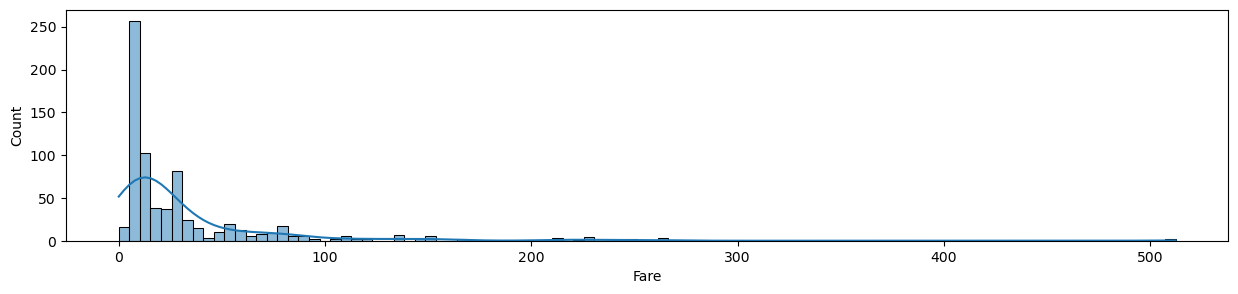

In [175]:
plt.figure(figsize=(15,3))
sns.histplot(data=X_prepro1, x='Fare', stat="count", kde=True)

In [176]:
yjt = YeoJohnsonTransformer()
yjt.fit(X_prepro1[['Fare']])

YeoJohnsonTransformer()

In [177]:
X_trans = pd.DataFrame()

In [178]:
X_trans_test = pd.DataFrame()

In [179]:
X_trans['Fare_transformed'] = yjt.transform(X_prepro1[['Fare']])
X_trans['Fare'] = X_prepro1['Fare']

In [180]:
X_trans_test['Fare_transformed'] = yjt.transform(X_prepro1_test[['Fare']])
X_trans_test['Fare'] = X_prepro1_test['Fare']

In [181]:
X_trans[['Fare', 'Fare_transformed']]

,Fare,Fare_transformed
692,56.4958,3.486357
481,0.0000,0.000000
527,221.7792,4.431708
855,9.3500,2.140875
801,26.2500,2.922005
...,...,...
359,7.8792,2.011833
258,512.3292,4.967578
736,34.3750,3.122899
462,38.5000,3.206617


<Axes: xlabel='Fare_transformed', ylabel='Count'>

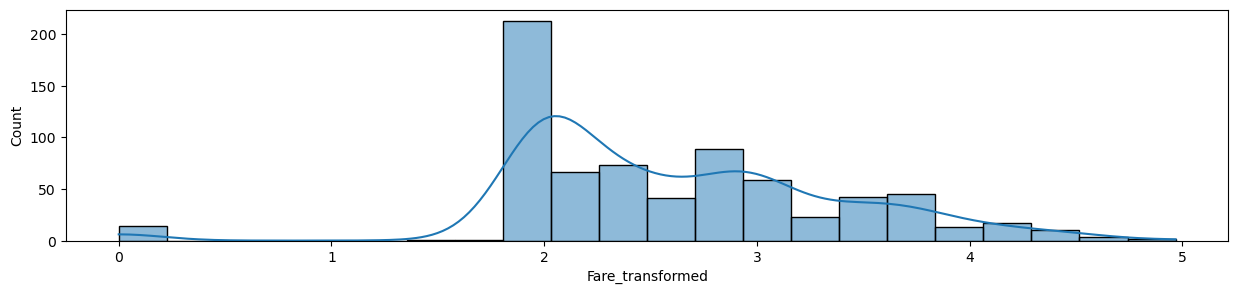

In [182]:
plt.figure(figsize=(15,3))
# Histograma de Age después de la imputación
sns.histplot(data=X_trans, x='Fare_transformed', stat="count", kde=True)

In [183]:
import scipy.stats as stats

In [184]:
def make_qqplot(df):
    variables = list(df.columns)
    plt.figure(figsize=(10, 6), constrained_layout=True)
    for i in range(2):
        # location in figure
        ax = plt.subplot(1, 2, i + 1)
        # variable to plot
        var = variables[i]
        # q-q plot
        stats.probplot((df[var]), dist="norm", plot=plt)
        # add variable name as title
        ax.set_title(var)
    plt.show()

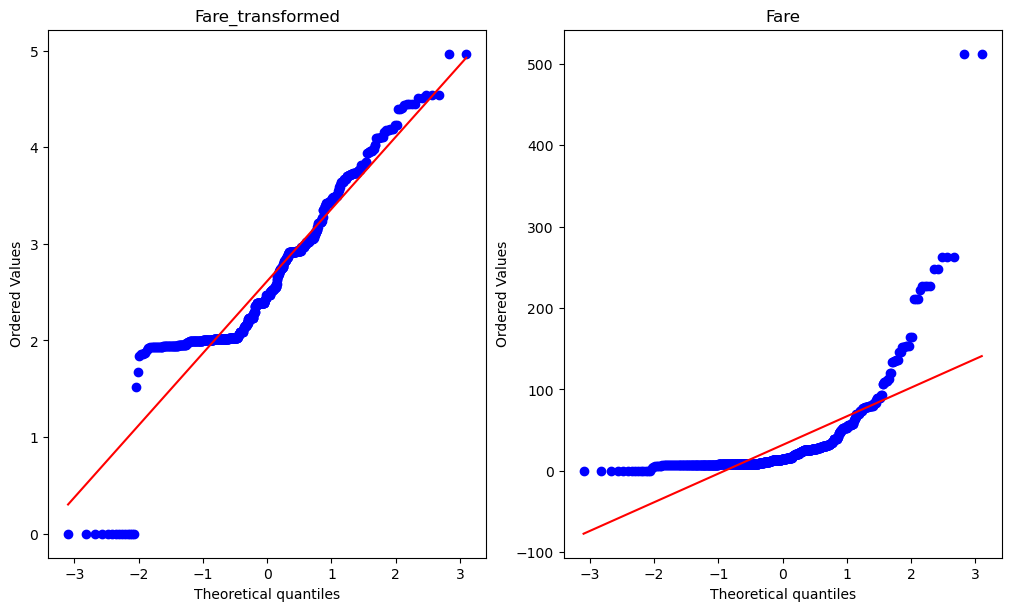

In [185]:
make_qqplot(X_trans)

#### Como Fare no puede ser cero (a menos que hayan sido regalo o por ser empleado) vamos a sustituir este valor por uno muy elevado, de manera tal que al aplicar la transformacion parezca tener una distribucion normal. Y crearemos una variable categorica que tome valor 1 si fare = 0

In [187]:
X_prepro1['Fare_0'] = np.where(X_prepro1['Fare'] == 0, 1, 0).astype(int)

In [188]:
X_prepro1_test['Fare_0'] = np.where(X_prepro1_test['Fare'] == 0, 1, 0).astype(int)

In [189]:
X_prepro2 = X_prepro1.copy()

In [190]:
X_prepro2_test = X_prepro1_test.copy()

In [191]:
X_prepro2['Fare'].max()

512.3292

In [192]:
X_prepro2['Fare'] = np.where(X_prepro2['Fare'] == 0, 700, X_prepro2['Fare'])

In [193]:
X_prepro2_test['Fare'] = np.where(X_prepro2_test['Fare'] == 0, 700, X_prepro2_test['Fare'])

In [194]:
X_prepro2['Fare'].min()

4.0125

In [195]:
# Clase para la creacion bivariable Fare_0
class FareZeroTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No hay necesidad de ajustar nada en este transformador
        return self

    def transform(self, X):
        # Verificamos que la entrada sea un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        # Creamos la nueva columna 'Fare_0'
        X['Fare_0'] = np.where(X['Fare'] == 0, 1, 0).astype(int)
        return X

In [196]:
# Clase para reemplzar las observaciones de Fare con valor 0 por 700
class FareReplacementTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='Fare', replacement_value=700):
        self.target_column = target_column
        self.replacement_value = replacement_value

    def fit(self, X, y=None):
        return self  # No necesitamos ajuste

    def transform(self, X):
        X = X.copy()
        X[self.target_column] = np.where(X[self.target_column] == 0, self.replacement_value, X[self.target_column])
        return X

In [197]:
# Para el pipeline
# ('fare_zero_transformer', FareZeroTransformer()),
# ('fare_replacement', FareReplacementTransformer()),

In [198]:
bct = BoxCoxTransformer()
bct.fit(X_prepro2[['Fare']])

BoxCoxTransformer()

In [199]:
X_trans = pd.DataFrame()

In [200]:
X_trans['Fare_transformed'] = bct.transform(X_prepro2[['Fare']])
X_trans['Fare'] = X_prepro2['Fare']

In [201]:
X_trans_test['Fare_transformed'] = bct.transform(X_prepro2_test[['Fare']])
X_trans_test['Fare'] = X_prepro2_test['Fare']

In [202]:
X_trans[['Fare', 'Fare_transformed']]

,Fare,Fare_transformed
692,56.4958,1.666464
481,700.0000,1.831050
527,221.7792,1.781627
855,9.3500,1.310865
801,26.2500,1.554623
...,...,...
359,7.8792,1.255966
258,512.3292,1.820447
736,34.3750,1.599229
462,38.5000,1.616156


<Axes: xlabel='Fare_transformed', ylabel='Count'>

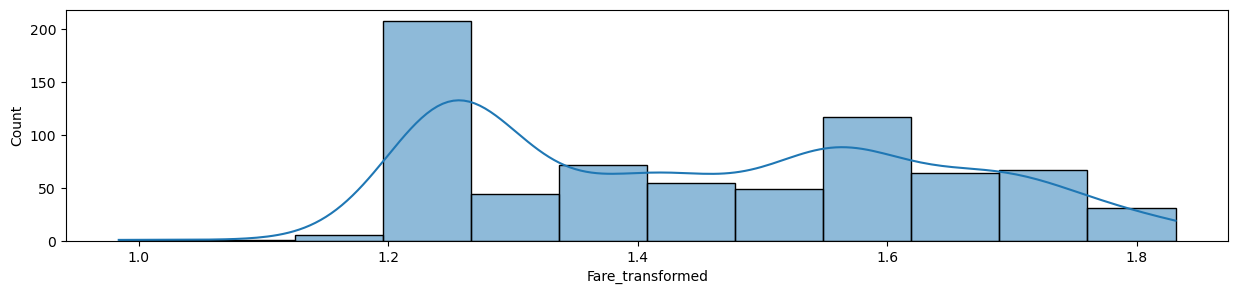

In [203]:
plt.figure(figsize=(15,3))
# Histograma de Age después de la imputación
sns.histplot(data=X_trans, x='Fare_transformed', stat="count", kde=True)

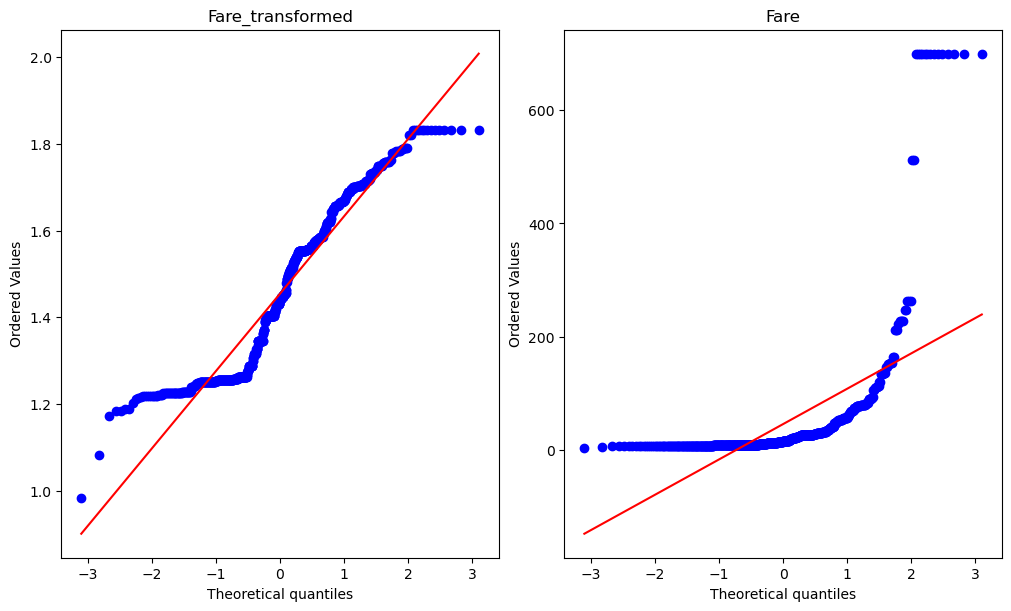

In [204]:
make_qqplot(X_trans)

In [205]:
X_prepro2['Fare'] = X_trans['Fare_transformed']

In [206]:
# Para el pipeline no hace falta crear una clase
# ('boxcox_transformer', BoxCoxTransformer(variables=['Fare'])),

In [207]:
X_prepro2.head()

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
692,NaN,1.666464,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
481,NaN,1.831050,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
527,NaN,1.781627,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
855,18.0,1.310865,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
801,31.0,1.554623,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [208]:
X_prepro2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      575 non-null    float64
 1   Fare                                     712 non-null    float64
 2   IsAlone                                  712 non-null    int32  
 3   Pclass_2                                 712 non-null    int32  
 4   Pclass_3                                 712 non-null    int32  
 5   Sex_male                                 712 non-null    int32  
 6   SibSp_2 hermanos                         712 non-null    int32  
 7   SibSp_3 o más hermanos                   712 non-null    int32  
 8   SibSp_Sin hermanos                       712 non-null    int32  
 9   Parch_2 padres/hijos                     712 non-null    int32  
 10  Parch_3 o más padres/hijos               712 non-null

In [209]:
X_prepro2_test['Fare'] = X_trans_test['Fare_transformed']

In [210]:
X_prepro2_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 565 to 637
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      139 non-null    float64
 1   Fare                                     179 non-null    float64
 2   IsAlone                                  179 non-null    int32  
 3   Pclass_2                                 179 non-null    int32  
 4   Pclass_3                                 179 non-null    int32  
 5   Sex_male                                 179 non-null    int32  
 6   SibSp_2 hermanos                         179 non-null    int32  
 7   SibSp_3 o más hermanos                   179 non-null    int32  
 8   SibSp_Sin hermanos                       179 non-null    int32  
 9   Parch_2 padres/hijos                     179 non-null    int32  
 10  Parch_3 o más padres/hijos               179 non-null

### Imputo los missing de Age

In [212]:
1 - X_train_imputed_recat2['Age'].count()/len(X_train_imputed_recat2)
# Dada la alta cantidad de missing imputaremos con MICE luego de hacer los preprocesos necesarios

0.1924157303370787

In [213]:
# let's create a MICE imputer using Bayes as estimator

imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=20, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)

In [214]:
imputer.fit(X_prepro2)

IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=0,
                 skip_complete=True)

In [215]:
train_t = imputer.transform(X_prepro2) # --> modifica los indices

In [216]:
train_t_test = imputer.transform(X_prepro2_test)

In [217]:
X_trans_test

,Fare_transformed,Fare
565,1.539492,24.1500
160,1.455603,16.1000
553,1.226208,7.2250
860,1.424161,14.1083
241,1.446784,15.5000
...,...,...
880,1.552920,26.0000
91,1.254899,7.8542
883,1.345345,10.5000
473,1.418532,13.7917


In [218]:
X_prepro3 = pd.DataFrame(train_t, columns=X_prepro2.columns, index=X_prepro2.index) # De esta manera se mantienen los indices originales
X_prepro3_test = pd.DataFrame(train_t_test, columns=X_prepro2_test.columns, index=X_prepro2_test.index)

In [219]:
X_prepro3

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
692,30.932025,1.666464,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
481,34.059857,1.831050,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
527,40.828138,1.781627,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
855,18.000000,1.310865,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
801,31.000000,1.554623,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,25.857926,1.255966,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
258,35.000000,1.820447,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
736,48.000000,1.599229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
462,47.000000,1.616156,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [220]:
X_prepro3.isnull().sum()

Age                                        0
Fare                                       0
IsAlone                                    0
Pclass_2                                   0
Pclass_3                                   0
Sex_male                                   0
SibSp_2 hermanos                           0
SibSp_3 o más hermanos                     0
SibSp_Sin hermanos                         0
Parch_2 padres/hijos                       0
Parch_3 o más padres/hijos                 0
Parch_Sin padres/hijos                     0
Embarked_Q                                 0
Embarked_S                                 0
Title_Miss                                 0
Title_Mr                                   0
Title_Mrs                                  0
Title_Rare_Title                           0
Cabin_num_Cabinas_extremos                 0
Cabin_num_Cabinas_mitad                    0
Cabin_num_Missing                          0
Cabin_category_Cabinas_clase_media         0
Cabin_cate

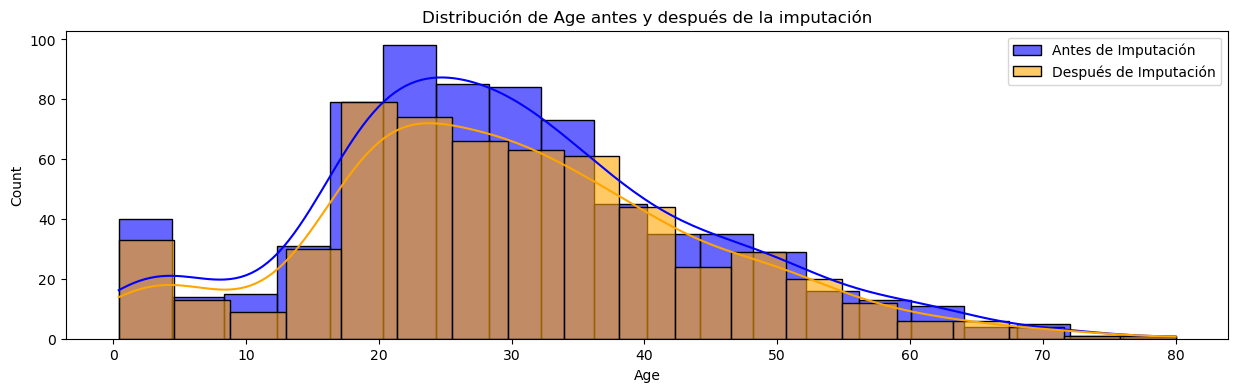

In [221]:
plt.figure(figsize=(15,4))
# Histograma de Age antes de la imputación
sns.histplot(data=df, x='Age', stat="count", kde=True, color='blue', label='Antes de Imputación', alpha=0.6)

# Histograma de Age después de la imputación
sns.histplot(data=X_prepro2, x='Age', stat="count", kde=True, color='orange', label='Después de Imputación', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Distribución de Age antes y después de la imputación')
plt.xlabel('Age')
plt.ylabel('Count')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [222]:
X_prepro3.describe()

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,29.961067,1.454472,0.609551,0.210674,0.549157,0.644663,0.029494,0.046348,0.693820,0.085674,...,0.150281,0.029494,0.023876,0.063202,0.779494,0.105337,0.077247,0.022472,0.775281,0.019663
std,13.591591,0.184968,0.488194,0.408074,0.497927,0.478952,0.169307,0.210386,0.461229,0.280079,...,0.357598,0.169307,0.152771,0.243497,0.414879,0.307203,0.267171,0.148317,0.417691,0.138937
min,0.420000,0.983878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.208941,1.257908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,30.000000,1.439787,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,38.000000,1.592878,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80.000000,1.831050,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
# Clase para realizar la imputación con MICE
class MICEImputer(BaseEstimator, TransformerMixin):
    def __init__(self, max_iter=20, random_state=0):
        self.max_iter = max_iter
        self.random_state = random_state
        self.imputer = IterativeImputer(
            estimator=BayesianRidge(),
            initial_strategy='mean',
            max_iter=self.max_iter,
            imputation_order='ascending',
            n_nearest_features=None,
            skip_complete=True,
            random_state=self.random_state,
        )

    def fit(self, X, y=None):
        self.imputer.fit(X)
        self.original_types = X.dtypes  # Guardar los tipos originales
        return self

    def transform(self, X):
        X_imputed = self.imputer.transform(X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)
        # Convertir de nuevo a los tipos originales
        for col in X_imputed_df.columns:
            if col in self.original_types.index:
                X_imputed_df[col] = X_imputed_df[col].astype(self.original_types[col])
        return X_imputed_df

In [224]:
# Para el pipeline
# ('mice_imputer', MICEImputer(max_iter=20, random_state=0)), 

### Analizo los outliers

In [226]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

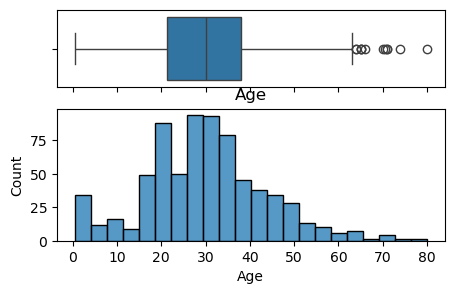

In [227]:
plot_boxplot_and_hist(X_prepro3, "Age")

In [228]:
# Supongamos que ya tienes el DataFrame X_prepro3
# Calcular Q1, Q3 y IQR
Q1 = X_prepro3['Age'].quantile(0.25)
Q3 = X_prepro3['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calcular el bigote superior
upper_whisker = Q3 + 1.5 * IQR

# Contar los valores de Age que están por encima del bigote superior
count_above_upper_whisker = (X_prepro3['Age'] > upper_whisker).sum()

# Mostrar el resultado
print(f"Número de valores de Age por encima del bigote superior: {count_above_upper_whisker}")


Número de valores de Age por encima del bigote superior: 12


In [229]:
def find_limits(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_limit = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[variable].quantile(0.75) + (IQR * 1.5)
    return lower_limit, upper_limit

In [230]:
lower_limit, upper_limit = find_limits(X_prepro3, "Age")
lower_limit, upper_limit

(-3.977648670945147, 63.18658920256709)

In [231]:
X_prepro3["Age"] = X_prepro3["Age"].clip(lower=lower_limit, upper=upper_limit)

In [232]:
X_prepro3_test["Age"] = X_prepro3_test["Age"].clip(lower=lower_limit, upper=upper_limit)

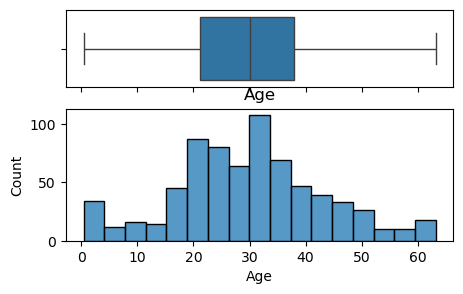

In [233]:
plot_boxplot_and_hist(X_prepro3, "Age")

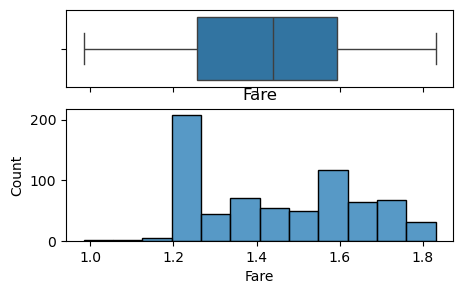

In [234]:
plot_boxplot_and_hist(X_prepro3, "Fare")

In [235]:
# Clase para reemplzar el valor de los puntos extremos 
class OutlierAdjuster(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
        self.limits = {}

    def fit(self, X, y=None):
        for variable in self.variables:
            lower_limit, upper_limit = self.find_limits(X, variable)
            self.limits[variable] = (lower_limit, upper_limit)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for variable, (lower_limit, upper_limit) in self.limits.items():
            # Recortar outliers
            X_transformed[variable] = X_transformed[variable].clip(lower=lower_limit, upper=upper_limit)
        return X_transformed

    def find_limits(self, df, variable):
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_limit = df[variable].quantile(0.25) - (IQR * 1.5)
        upper_limit = df[variable].quantile(0.75) + (IQR * 1.5)
        return lower_limit, upper_limit

In [236]:
# Para el pipeline
# ('outlier_adjustment', OutlierAdjuster(variables=['Fare', 'Age'])),

### Escalo los valores fare y age

In [238]:
scaler = MinMaxScaler().set_output(transform="pandas")

In [239]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_prepro3[['Age', 'Fare']])

MinMaxScaler()

In [240]:
# transform train and test sets
X_prepro3[['Age', 'Fare']] = scaler.transform(X_prepro3[['Age', 'Fare']])

In [241]:
# transform train and test sets
X_prepro3_test[['Age', 'Fare']] = scaler.transform(X_prepro3_test[['Age', 'Fare']])

In [242]:
X_train = X_prepro3.copy() 
X_test = X_prepro3_test.copy() 
#y_train = y_train.values.ravel()
#y_test = y_test.values.ravel()

In [243]:
# Clase para escalar segun solo las caracteristicas deseadas
class CustomMinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X[self.features])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = self.scaler.transform(X[self.features])
        return X_transformed

In [244]:
# Para el pipeline
# ('scaler', CustomMinMaxScaler(features=['Age', 'Fare'])),

In [245]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 26)
(712, 1)
(179, 26)
(179, 1)


In [246]:
X_train

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
692,0.486119,0.805724,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
481,0.535952,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
527,0.643784,0.941661,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
855,0.280085,0.385974,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
801,0.487202,0.673707,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.405278,0.321173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
258,0.550930,0.987485,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
736,0.758047,0.726359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
462,0.742115,0.746340,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [247]:
y_train

,Survived
692,1
481,0
527,0
855,1
801,1
...,...
359,1
258,1
736,0
462,0


In [248]:
train_data = pd.concat([X_train, y_train], axis=1)

In [249]:
train_data.isnull().sum()

Age                                        0
Fare                                       0
IsAlone                                    0
Pclass_2                                   0
Pclass_3                                   0
Sex_male                                   0
SibSp_2 hermanos                           0
SibSp_3 o más hermanos                     0
SibSp_Sin hermanos                         0
Parch_2 padres/hijos                       0
Parch_3 o más padres/hijos                 0
Parch_Sin padres/hijos                     0
Embarked_Q                                 0
Embarked_S                                 0
Title_Miss                                 0
Title_Mr                                   0
Title_Mrs                                  0
Title_Rare_Title                           0
Cabin_num_Cabinas_extremos                 0
Cabin_num_Cabinas_mitad                    0
Cabin_num_Missing                          0
Cabin_category_Cabinas_clase_media         0
Cabin_cate

In [250]:
test_data = pd.concat([X_test, y_test], axis=1)

In [251]:
test_data.isnull().sum()

Age                                        0
Fare                                       0
IsAlone                                    0
Pclass_2                                   0
Pclass_3                                   0
Sex_male                                   0
SibSp_2 hermanos                           0
SibSp_3 o más hermanos                     0
SibSp_Sin hermanos                         0
Parch_2 padres/hijos                       0
Parch_3 o más padres/hijos                 0
Parch_Sin padres/hijos                     0
Embarked_Q                                 0
Embarked_S                                 0
Title_Miss                                 0
Title_Mr                                   0
Title_Mrs                                  0
Title_Rare_Title                           0
Cabin_num_Cabinas_extremos                 0
Cabin_num_Cabinas_mitad                    0
Cabin_num_Missing                          0
Cabin_category_Cabinas_clase_media         0
Cabin_cate

In [252]:
data = pd.concat([train_data, test_data], axis=0)

In [253]:
data

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0,Survived
692,0.486119,0.805724,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
481,0.535952,1.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0
527,0.643784,0.941661,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
855,0.280085,0.385974,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
801,0.487202,0.673707,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.391610,0.671697,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
91,0.311949,0.319913,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
883,0.439406,0.426674,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
473,0.359746,0.513065,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1


In [254]:
data.isnull().sum().sum()

0

interval columns not set, guessing: ['Age', 'Fare', 'IsAlone', 'Pclass_2', 'Pclass_3', 'Sex_male', 'SibSp_2 hermanos', 'SibSp_3 o más hermanos', 'SibSp_Sin hermanos', 'Parch_2 padres/hijos', 'Parch_3 o más padres/hijos', 'Parch_Sin padres/hijos', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare_Title', 'Cabin_num_Cabinas_extremos', 'Cabin_num_Cabinas_mitad', 'Cabin_num_Missing', 'Cabin_category_Cabinas_clase_media', 'Cabin_category_Cabinas_clase_media_baja', 'Cabin_category_Cabinas_economicas', 'Cabin_category_Missing', 'Fare_0']


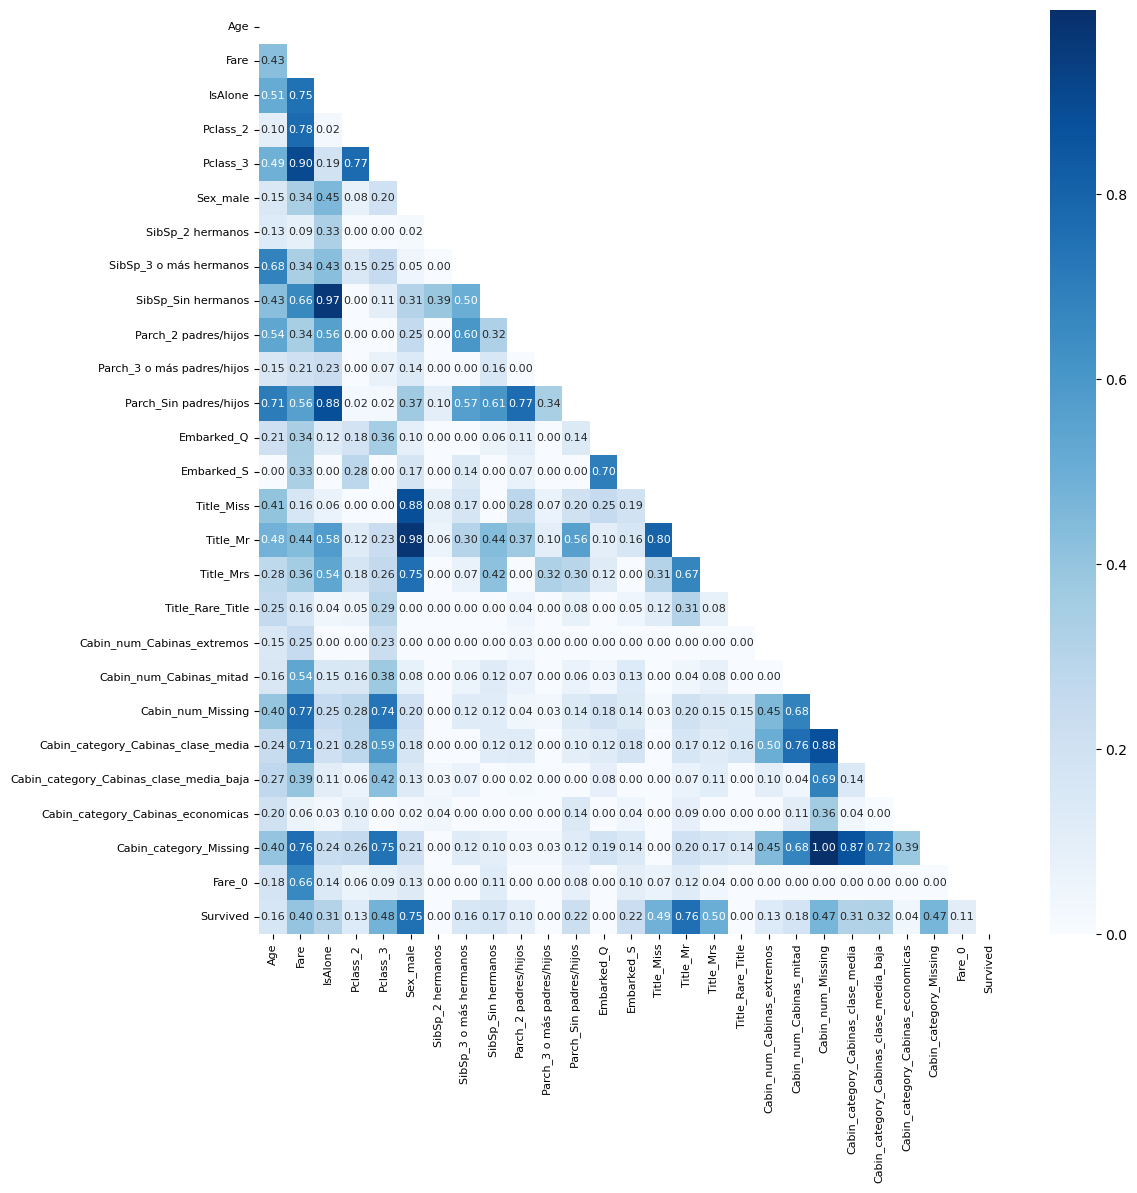

In [255]:
# Calcular la matriz de correlación usando phik
corr_matrix = phik_matrix(data)

# Crear una máscara para el triángulo superior
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 12))
ax = sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', mask=mask,
                 annot_kws={"size": 8})

# Ajustar el tamaño de las etiquetas de los ejes
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

plt.show();

In [256]:
# Clase para poder obtener el titulo a partir del la caracteristica nombre
class TitleExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, name_column='Name', title_column='Title'):
        # Columnas de entrada y salida
        self.name_column = name_column
        self.title_column = title_column

    def fit(self, X, y=None):
        # La clase no necesita ajuste
        return self

    def transform(self, X, y=None):
        # Crear una copia para evitar cambios en el DataFrame original
        X = X.copy()
        
        # Extraer el título de la columna 'Name' y crear la columna 'Title'
        X[self.title_column] = X[self.name_column].str.extract(r' ([A-Za-z]+)\.', expand=False)
        
        return X

In [257]:
titanic_preprocessing_pipeline = Pipeline([
    ('title_extractor', TitleExtractor(name_column='Name', title_column='Title')),
    ('is_alone_extractor', IsAloneFeatureExtractor(sibsp_column='SibSp', parch_column='Parch', is_alone_column='IsAlone')),
    ('cabin_category_extractor', CabinCategoryExtractor(cabin_column='Cabin', category_column='Cabin_cat')),
    ('cabin_number_extractor', CabinNumberExtractor(cabin_column='Cabin', number_column='Cabin_num')),
    ('drop_features', DropFeatures(features_to_drop=['Name', 'Cabin', 'Ticket', 'PassengerId'])),
    ('impute_cabin_cat', CategoricalImputer(imputation_method="missing", fill_value="Missing", variables=['Cabin_cat'])),
    ('impute_cabin_num', CategoricalImputer(imputation_method="missing", fill_value="0", variables=['Cabin_num'])),
    ('impute_embarked', CategoricalImputer(imputation_method="frequent", variables=['Embarked'])),
    ('dtype_fisrt_converter', DType_first_Converter()),
    ('cabin_recategorizer', CabinRecategorizer()),
    ('drop_Cabin_cat', DropFeatures(features_to_drop=['Cabin_cat'])),
    ('cabin_discretiser', CustomCabinNumDiscretiser()),
    ('cabin_num_mapper', CabinNumMapper()),
    
    ('rare_encoder', RareLabelEncoder(tol=0.04, n_categories=4, variables=["Title"], replace_with='Rare_Title')),
    ('family_discretiser', CustomDiscretiser()),    
    ('family_mapper', FamilySizeMapper()), 
        
    ('custom_onehot_encoder', CustomOneHotEncoder_drop_first()),
    # o
    #('custom_onehot_encoder', CustomOneHotEncoder_if_binary()),
    
    ('fare_zero_transformer', FareZeroTransformer()),
    ('fare_replacement', FareReplacementTransformer()),
    ('boxcox_transformer', BoxCoxTransformer(variables=['Fare'])),
    ('mice_imputer', MICEImputer(max_iter=20, random_state=0)), 
    ('outlier_adjustment', OutlierAdjuster(variables=['Fare', 'Age'])),
    ('scaler', CustomMinMaxScaler(features=['Age', 'Fare']))
])    

In [258]:
df_raw = raw_data.copy()
prueba_data = df_raw.sample(50)  # Selecciona una muestra pequeña
prueba_data = prueba_data.drop(columns = "Survived")

In [259]:
for nombre, paso in titanic_preprocessing_pipeline.steps:
    prueba_data = paso.fit_transform(prueba_data)
    print(f"\nDespués de {nombre}:\n",prueba_data.head(10))


Después de title_extractor:
      PassengerId  Pclass                                            Name  \
5              6       3                                Moran, Mr. James   
62            63       1                     Harris, Mr. Henry Birkhardt   
92            93       1                     Chaffee, Mr. Herbert Fuller   
132          133       3  Robins, Mrs. Alexander A (Grace Charity Laury)   
499          500       3                              Svensson, Mr. Olof   
43            44       2        Laroche, Miss. Simonne Marie Anne Andree   
123          124       2                             Webber, Miss. Susan   
337          338       1                 Burns, Miss. Elizabeth Margaret   
490          491       3            Hagland, Mr. Konrad Mathias Reiersen   
650          651       3                               Mitkoff, Mr. Mito   

        Sex   Age  SibSp  Parch         Ticket      Fare Cabin Embarked Title  
5      male   NaN      0      0         330877    8.4

C:\Users\germa\anaconda3\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Title is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [260]:
df_raw = raw_data.copy()
prueba_data = df_raw.sample(50)  # Selecciona una muestra pequeña
prueba_data = prueba_data.drop(columns = "Survived")

In [261]:
for nombre, paso in titanic_preprocessing_pipeline.steps:
    prueba_data = paso.fit_transform(prueba_data)
    print(f"\nDespués de {nombre}:\n",prueba_data.dtypes)


Después de title_extractor:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

Después de is_alone_extractor:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
IsAlone          int32
dtype: object

Después de cabin_category_extractor:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
IsAlone          in

In [262]:
df_raw = raw_data.copy()
prueba_data = df_raw.sample(50)  # Selecciona una muestra pequeña
prueba_data = prueba_data.drop(columns = "Survived")

In [263]:
for nombre, paso in titanic_preprocessing_pipeline.steps:
    prueba_data = paso.fit_transform(prueba_data)
    # Filtrar y mostrar solo las columnas con nulos
    nulos = prueba_data.isnull().sum()
    nulos_con_datos = nulos[nulos > 0]  # Solo columnas con nulos
    print(f"\nNulos después de {nombre}:\n",nulos_con_datos)


Nulos después de title_extractor:
 Age       6
Cabin    40
dtype: int64

Nulos después de is_alone_extractor:
 Age       6
Cabin    40
dtype: int64

Nulos después de cabin_category_extractor:
 Age           6
Cabin        40
Cabin_cat    40
dtype: int64

Nulos después de cabin_number_extractor:
 Age           6
Cabin        40
Cabin_cat    40
Cabin_num    40
dtype: int64

Nulos después de drop_features:
 Age           6
Cabin_cat    40
Cabin_num    40
dtype: int64

Nulos después de impute_cabin_cat:
 Age           6
Cabin_num    40
dtype: int64

Nulos después de impute_cabin_num:
 Age    6
dtype: int64

Nulos después de impute_embarked:
 Age    6
dtype: int64

Nulos después de dtype_fisrt_converter:
 Age    6
dtype: int64

Nulos después de cabin_recategorizer:
 Age    6
dtype: int64

Nulos después de drop_Cabin_cat:
 Age    6
dtype: int64

Nulos después de cabin_discretiser:
 Age    6
dtype: int64

Nulos después de cabin_num_mapper:
 Age    6
dtype: int64

Nulos después de rare_encode

C:\Users\germa\anaconda3\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Title is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [264]:
X_pipe_train, X_pipe_test, y_pipe_train, y_pipe_test = train_test_split( X,y,test_size = 0.2,random_state = 42, stratify=y)

In [265]:
# Aplicar el pipeline para preprocesar el conjunto de entrenamiento
titanic_pipe_df_train = titanic_preprocessing_pipeline.fit_transform(X_pipe_train)

In [266]:
# Ver el DataFrame resultante
titanic_pipe_df_train

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
692,0.486119,0.805724,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
481,0.535952,1.000000,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
527,0.643784,0.941661,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
855,0.280085,0.385974,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
801,0.487202,0.673707,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.405278,0.321173,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
258,0.550930,0.987485,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
736,0.758047,0.726359,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
462,0.742115,0.746340,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


### Comparo el dataframe resultate de aplicar el pipeline con dataframe resultante de aplicar las transformaciones por separado

In [268]:
# Verificar si son iguales
are_equal = titanic_pipe_df_train.equals(X_train)
print("\n¿Son iguales los DataFrames?", are_equal)


¿Son iguales los DataFrames? False


In [269]:
titanic_pipe_df_train.columns.tolist() == X_train.columns.tolist()

True

In [270]:
X_train.columns.tolist();

In [271]:
titanic_pipe_df_train.columns.tolist();

In [272]:
# Comparar fila por fila
if not are_equal:
    differences = titanic_pipe_df_train.compare(X_train)
    print("\nDiferencias entre los DataFrames:")
    print(differences)


Diferencias entre los DataFrames:
Empty DataFrame
Columns: []
Index: []


In [273]:
print("¿Los DataFrames son exactamente iguales?:", are_equal)

# Si quieres ver diferencias columna por columna
if not are_equal:
    for column in titanic_pipe_df_train.columns:
        if not titanic_pipe_df_train[column].equals(X_train[column]):
            print(f"Diferencias en la columna: {column}")
            print("Valores en titanic_pipe_df_train:")
            print(titanic_pipe_df_train[column].unique())
            print("Valores en X_train:")
            print(X_train[column].unique())

¿Los DataFrames son exactamente iguales?: False
Diferencias en la columna: IsAlone
Valores en titanic_pipe_df_train:
[1 0]
Valores en X_train:
[1. 0.]
Diferencias en la columna: Pclass_2
Valores en titanic_pipe_df_train:
[0 1]
Valores en X_train:
[0. 1.]
Diferencias en la columna: Pclass_3
Valores en titanic_pipe_df_train:
[1 0]
Valores en X_train:
[1. 0.]
Diferencias en la columna: Sex_male
Valores en titanic_pipe_df_train:
[1 0]
Valores en X_train:
[1. 0.]
Diferencias en la columna: SibSp_2 hermanos
Valores en titanic_pipe_df_train:
[0 1]
Valores en X_train:
[0. 1.]
Diferencias en la columna: SibSp_3 o más hermanos
Valores en titanic_pipe_df_train:
[0 1]
Valores en X_train:
[0. 1.]
Diferencias en la columna: SibSp_Sin hermanos
Valores en titanic_pipe_df_train:
[1 0]
Valores en X_train:
[1. 0.]
Diferencias en la columna: Parch_2 padres/hijos
Valores en titanic_pipe_df_train:
[0 1]
Valores en X_train:
[0. 1.]
Diferencias en la columna: Parch_3 o más padres/hijos
Valores en titanic_pipe

In [274]:
# En X_train todos los valores son flotantes, esto no es un impedimento. Solo se debe tener en cuenta si el conjunto de datos es muy grande
X_train.dtypes

Age                                        float64
Fare                                       float64
IsAlone                                    float64
Pclass_2                                   float64
Pclass_3                                   float64
Sex_male                                   float64
SibSp_2 hermanos                           float64
SibSp_3 o más hermanos                     float64
SibSp_Sin hermanos                         float64
Parch_2 padres/hijos                       float64
Parch_3 o más padres/hijos                 float64
Parch_Sin padres/hijos                     float64
Embarked_Q                                 float64
Embarked_S                                 float64
Title_Miss                                 float64
Title_Mr                                   float64
Title_Mrs                                  float64
Title_Rare_Title                           float64
Cabin_num_Cabinas_extremos                 float64
Cabin_num_Cabinas_mitad        

In [275]:
#### Creo un pipeline donde solo elimino las dummies de las caracteristicas bicategoricas

In [292]:
titanic_preprocessing_pipeline_for_tree = Pipeline([
    ('title_extractor', TitleExtractor(name_column='Name', title_column='Title')),
    ('is_alone_extractor', IsAloneFeatureExtractor(sibsp_column='SibSp', parch_column='Parch', is_alone_column='IsAlone')),
    ('cabin_category_extractor', CabinCategoryExtractor(cabin_column='Cabin', category_column='Cabin_cat')),
    ('cabin_number_extractor', CabinNumberExtractor(cabin_column='Cabin', number_column='Cabin_num')),
    ('drop_features', DropFeatures(features_to_drop=['Name', 'Cabin', 'Ticket', 'PassengerId'])),
    ('impute_cabin_cat', CategoricalImputer(imputation_method="missing", fill_value="Missing", variables=['Cabin_cat'])),
    ('impute_cabin_num', CategoricalImputer(imputation_method="missing", fill_value="0", variables=['Cabin_num'])),
    ('impute_embarked', CategoricalImputer(imputation_method="frequent", variables=['Embarked'])),
    ('dtype_fisrt_converter', DType_first_Converter()),
    ('cabin_recategorizer', CabinRecategorizer()),
    ('drop_Cabin_cat', DropFeatures(features_to_drop=['Cabin_cat'])),
    ('cabin_discretiser', CustomCabinNumDiscretiser()),
    ('cabin_num_mapper', CabinNumMapper()),
    
    ('rare_encoder', RareLabelEncoder(tol=0.04, n_categories=4, variables=["Title"], replace_with='Rare_Title')),
    ('family_discretiser', CustomDiscretiser()),    
    ('family_mapper', FamilySizeMapper()), 
        
    ('custom_onehot_encoder', CustomOneHotEncoder_if_binary()),
    
    ('fare_zero_transformer', FareZeroTransformer()),
    ('fare_replacement', FareReplacementTransformer()),
    ('boxcox_transformer', BoxCoxTransformer(variables=['Fare'])),
    ('mice_imputer', MICEImputer(max_iter=20, random_state=0)), 
    ('outlier_adjustment', OutlierAdjuster(variables=['Fare', 'Age'])),
    ('scaler', CustomMinMaxScaler(features=['Age', 'Fare']))
])  

In [294]:
# Aplicar el pipeline a X_train
titanic_pipe_df_train = titanic_preprocessing_pipeline.fit_transform(X_pipe_train)
titanic_pipe_df_train_for_trees = titanic_preprocessing_pipeline_for_tree.fit_transform(X_pipe_train)

# Transformar X_test (si lo necesitas, aunque en este caso solo exportaremos el entrenamiento)
titanic_pipe_df_test = titanic_preprocessing_pipeline.transform(X_pipe_test)
titanic_pipe_df_test_for_trees = titanic_preprocessing_pipeline_for_tree.transform(X_pipe_test)

In [296]:
titanic_pipe_df_test

,Age,Fare,IsAlone,Pclass_2,Pclass_3,Sex_male,SibSp_2 hermanos,SibSp_3 o más hermanos,SibSp_Sin hermanos,Parch_2 padres/hijos,...,Title_Mrs,Title_Rare_Title,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
565,0.375678,0.655846,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
160,0.694318,0.556824,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
553,0.343813,0.286046,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
860,0.646522,0.519709,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
241,0.332320,0.546414,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.391610,0.671697,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
91,0.311949,0.319913,1,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
883,0.439406,0.426674,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
473,0.359746,0.513065,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0


In [298]:
titanic_pipe_df_test_for_trees

,Age,Fare,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_male,SibSp_1 hermano,SibSp_2 hermanos,SibSp_3 o más hermanos,...,Cabin_num_Cabinas_Centro,Cabin_num_Cabinas_extremos,Cabin_num_Cabinas_mitad,Cabin_num_Missing,Cabin_category_Cabina_Lujo,Cabin_category_Cabinas_clase_media,Cabin_category_Cabinas_clase_media_baja,Cabin_category_Cabinas_economicas,Cabin_category_Missing,Fare_0
565,0.377075,0.655846,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
160,0.696901,0.556824,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
553,0.345092,0.286046,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
860,0.648927,0.519709,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
241,0.338139,0.546414,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,0.393066,0.671697,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
91,0.313110,0.319913,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
883,0.441040,0.426674,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
473,0.361084,0.513065,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [304]:
# Definir una función para convertir el índice a columna, nombrarla y exportar el DataFrame
def export_with_index(df, filepath, index_name='IndexName'):
    df_with_index = df.reset_index().rename(columns={'index': index_name})
    df_with_index.to_csv(filepath, index=False)

# Aplicar la función a cada DataFrame y exportarlo
export_with_index(titanic_pipe_df_train, '../Titanic/Dataset Titanic/titanic_pipe_df_train.csv')
export_with_index(titanic_pipe_df_train_for_trees, '../Titanic/Dataset Titanic/titanic_pipe_df_train_for_trees.csv')
export_with_index(titanic_pipe_df_test, '../Titanic/Dataset Titanic/titanic_pipe_df_test.csv')
export_with_index(titanic_pipe_df_test_for_trees, '../Titanic/Dataset Titanic/titanic_pipe_df_test_for_trees.csv')
export_with_index(y_pipe_train, '../Titanic/Dataset Titanic/y_pipe_train.csv')
export_with_index(y_pipe_test, '../Titanic/Dataset Titanic/y_pipe_test.csv')